Whenever I plot a heatmap I always wonder what colormap looks best so I plotted all of them to reference whenever I need. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.random.normal(size=100)

y = x + np.random.normal(scale=0.5, size=len(x))
z = x + np.random.normal(size=len(x))
w = x + np.random.normal(scale=3, size=len(x))

a = -x + np.random.normal(scale=0.5, size=len(x))
b = -x + np.random.normal(size=len(x))
c = -x + np.random.normal(scale=3, size=len(x))

In [3]:
X = np.vstack((x,y,z,w,a,b,c)).T
X = pd.DataFrame(X, columns=['x', 'y', 'z', 'w', 'a', 'b', 'c'])
X.head()

x         y         z         w         a         b         c
0  0.425906  0.271635  0.194768  1.073513 -0.098557 -1.004025  2.505368
1  0.115055  0.143776 -0.640671 -3.830668 -0.073191  0.285427 -3.544784
2  0.832737  1.037568  2.126694  0.199613 -0.940395 -0.430275  0.500212
3  0.184662  0.742568 -1.045156 -1.592755 -0.371661 -2.635520 -0.340533
4  0.134907  0.529559 -0.793388  5.423172 -0.795652 -0.138155 -1.182530

In [4]:
corrs = X.corr()
corrs

x         y         z         w         a         b         c
x  1.000000  0.915187  0.747074  0.336111 -0.920081 -0.729623 -0.355170
y  0.915187  1.000000  0.683262  0.264998 -0.851436 -0.668768 -0.283206
z  0.747074  0.683262  1.000000  0.255584 -0.663781 -0.499923 -0.239984
w  0.336111  0.264998  0.255584  1.000000 -0.291167 -0.193818 -0.117335
a -0.920081 -0.851436 -0.663781 -0.291167  1.000000  0.706377  0.362516
b -0.729623 -0.668768 -0.499923 -0.193818  0.706377  1.000000  0.283028
c -0.355170 -0.283206 -0.239984 -0.117335  0.362516  0.283028  1.000000

In [5]:
import re

cmaps = '''Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, 
           CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r,
           OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r,
           Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd,
           PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r,
           RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral,
           Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd,
           YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r,
           bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, 
           cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r,
           gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, 
           gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r,
           hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r,
           mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r,
           prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r,
           summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r,
           terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis,
           viridis_r, vlag, vlag_r, winter, winter_r'''

pattern = re.compile(r'\s')

cmaps = pattern.sub('', cmaps).split(',')
cmaps = np.array(cmaps).reshape((-1, 4))

print(f'There are {cmaps.size} colormaps.')
cmaps[:5], cmaps.size

There are 172 colormaps.


(array([['Accent', 'Accent_r', 'Blues', 'Blues_r'],
        ['BrBG', 'BrBG_r', 'BuGn', 'BuGn_r'],
        ['BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r'],
        ['Dark2', 'Dark2_r', 'GnBu', 'GnBu_r'],
        ['Greens', 'Greens_r', 'Greys', 'Greys_r']], dtype='<U18'), 172)

# WITH ANNOTATIONS

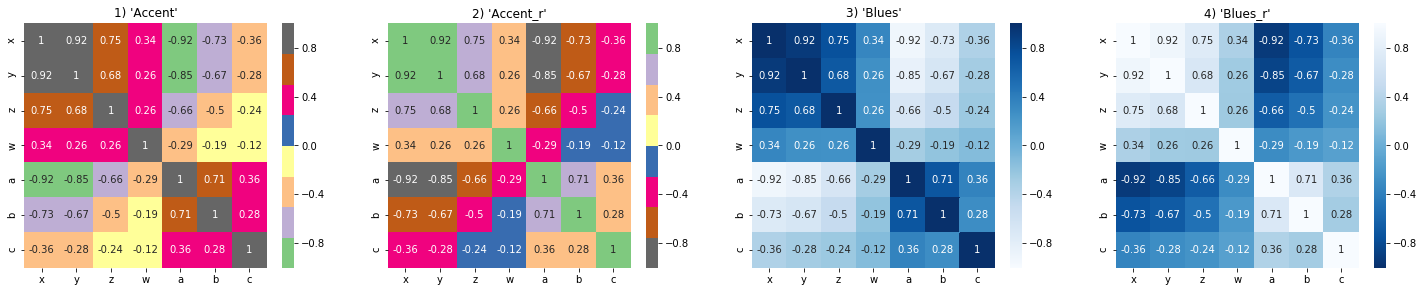

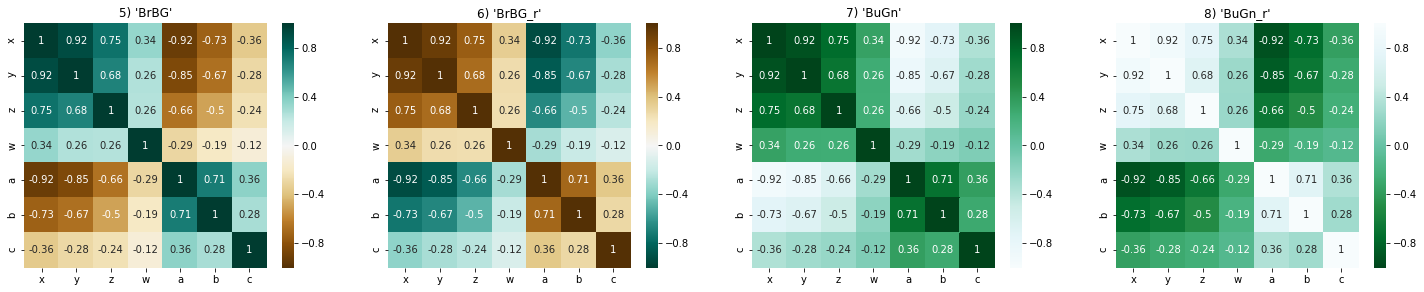

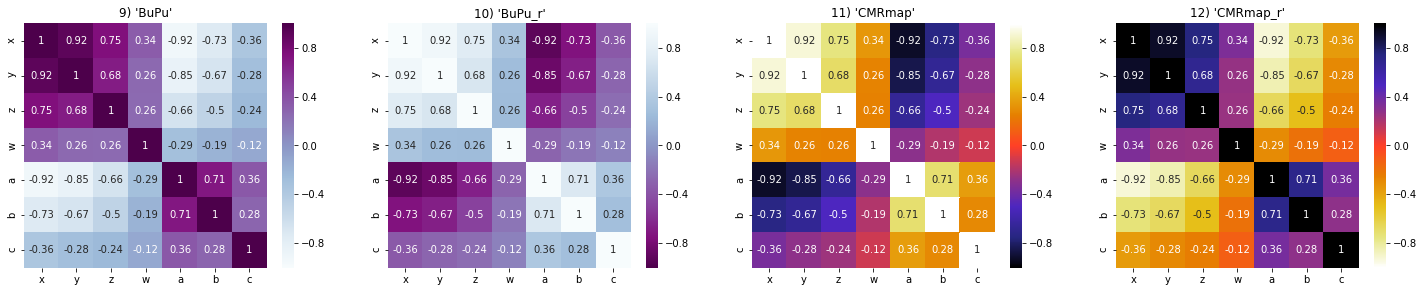

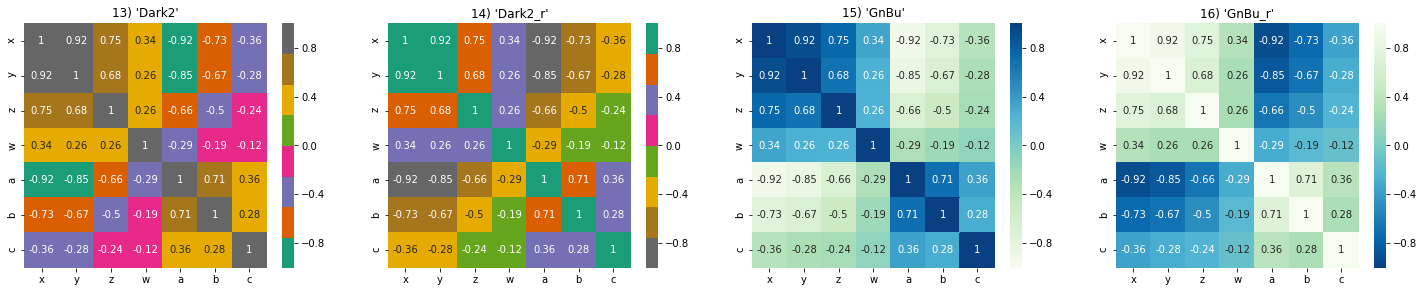

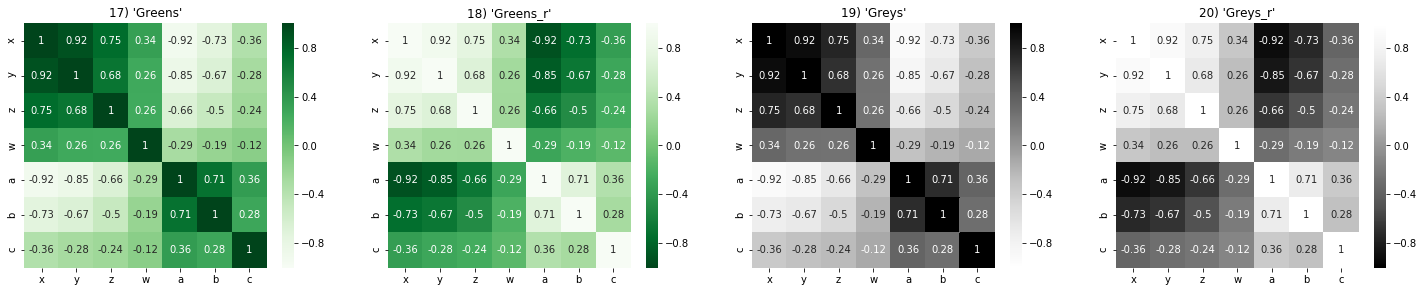

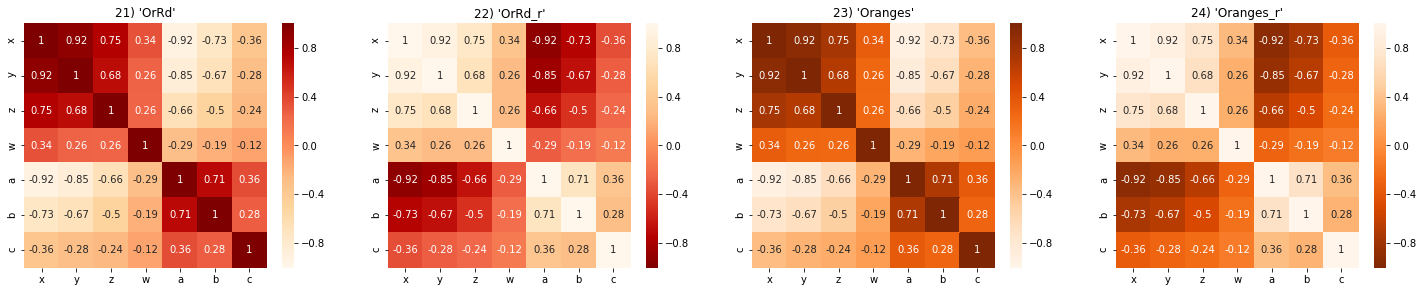

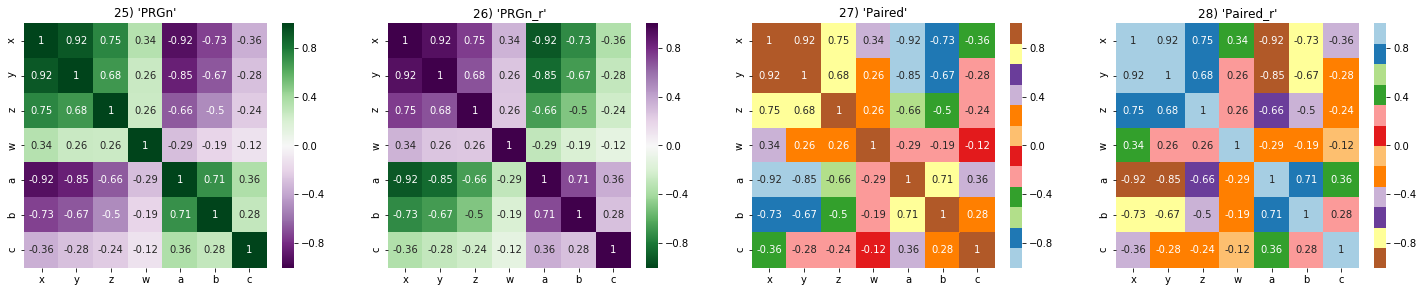

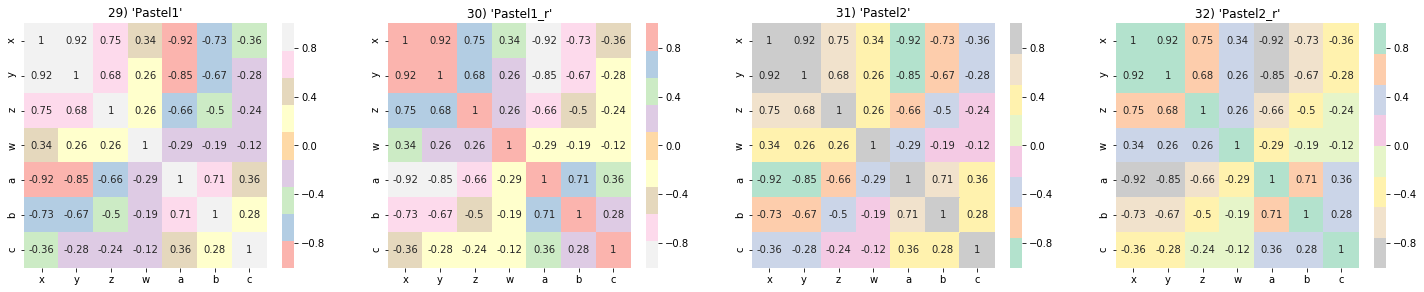

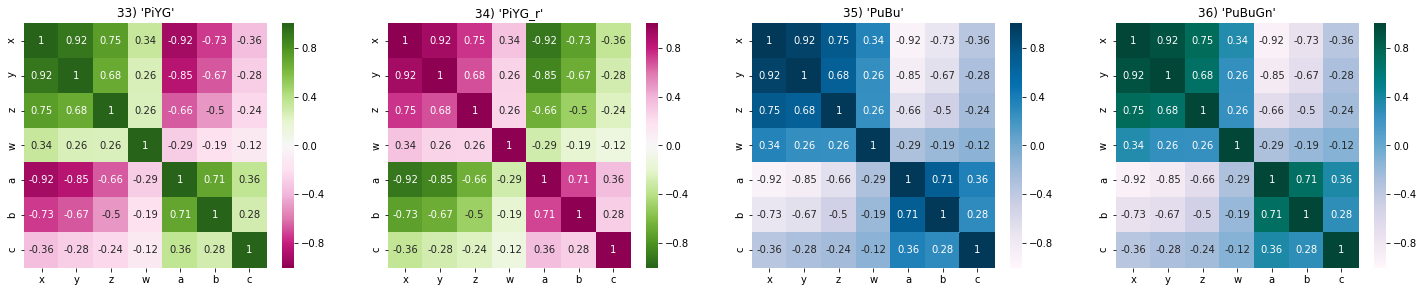

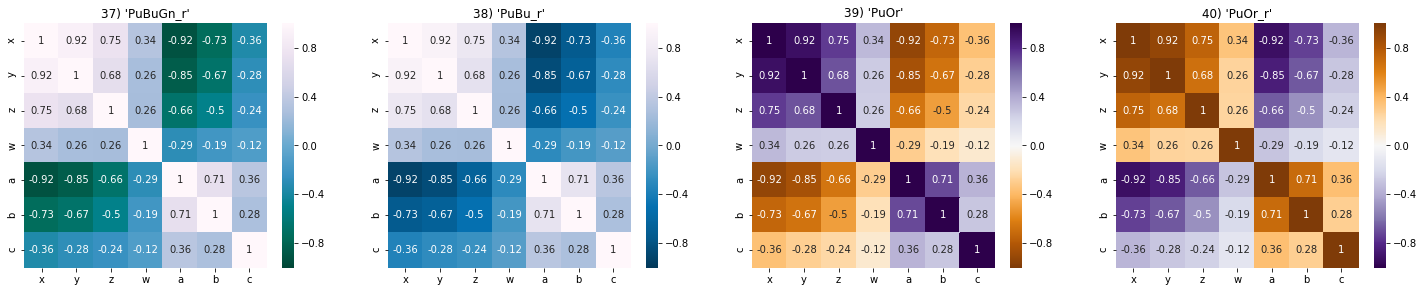

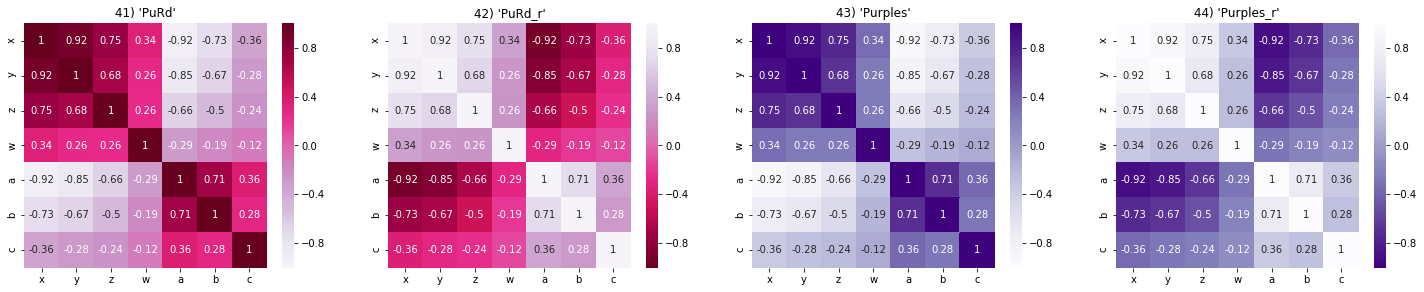

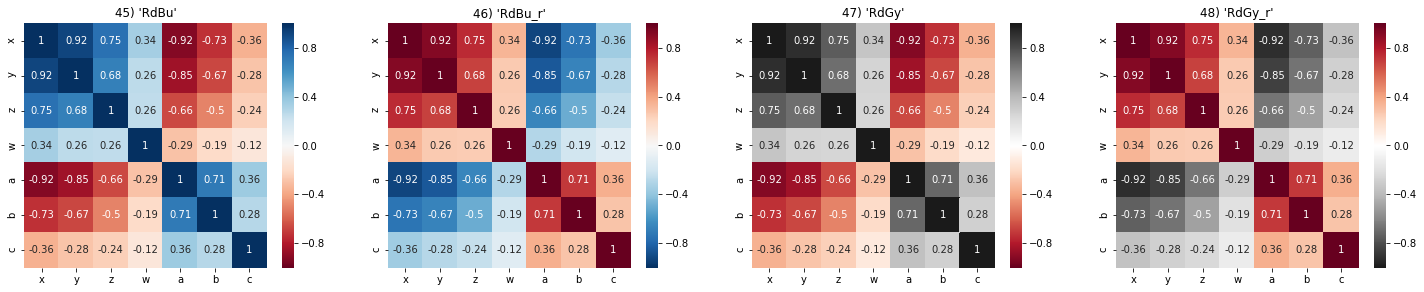

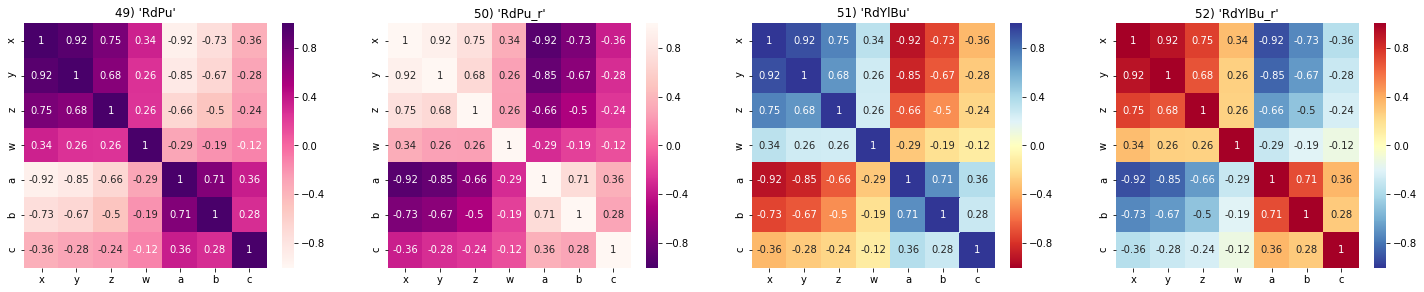

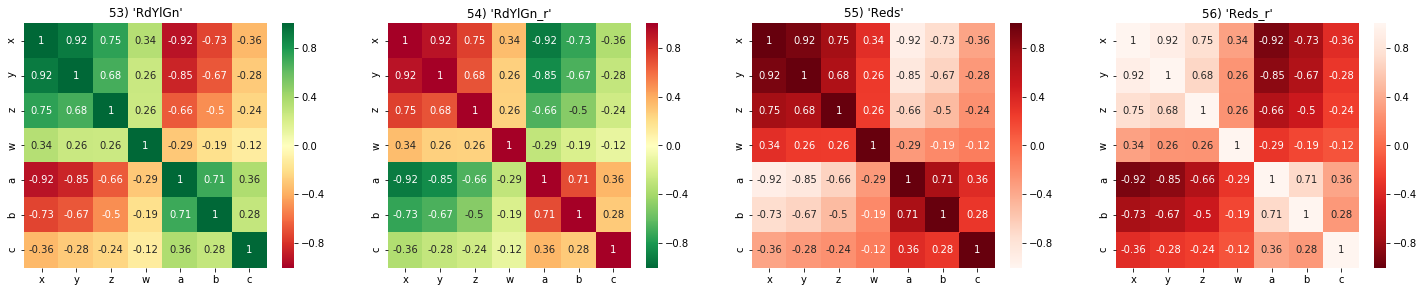

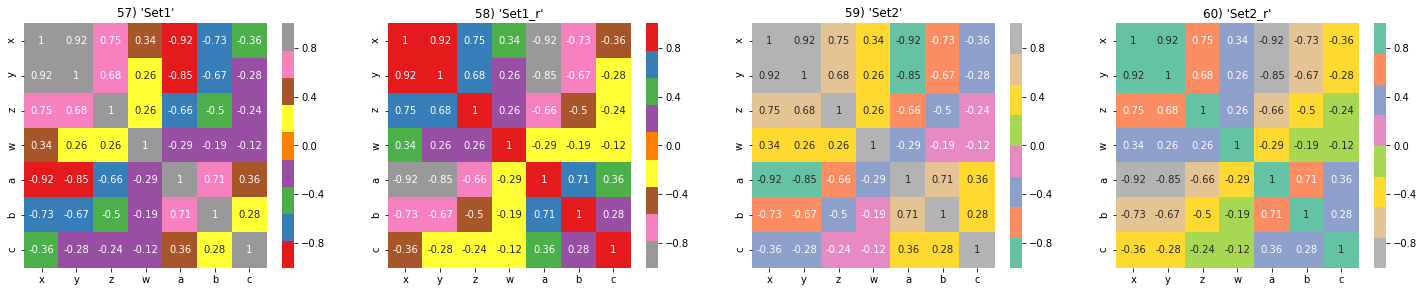

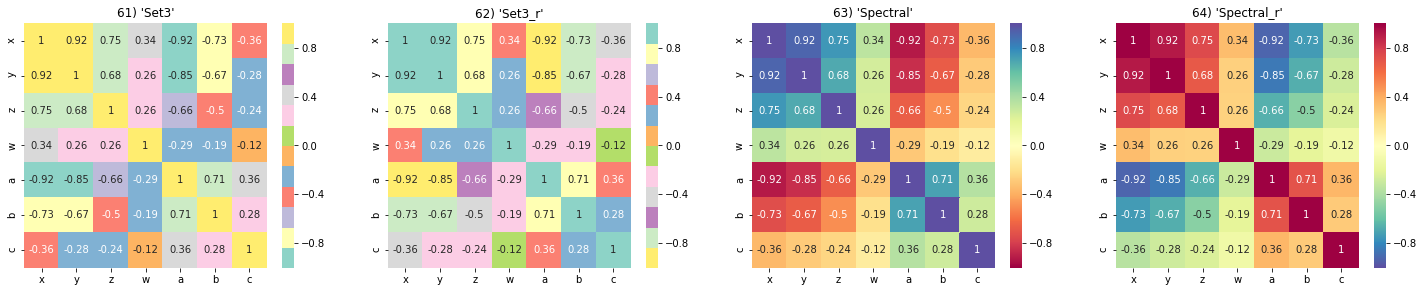

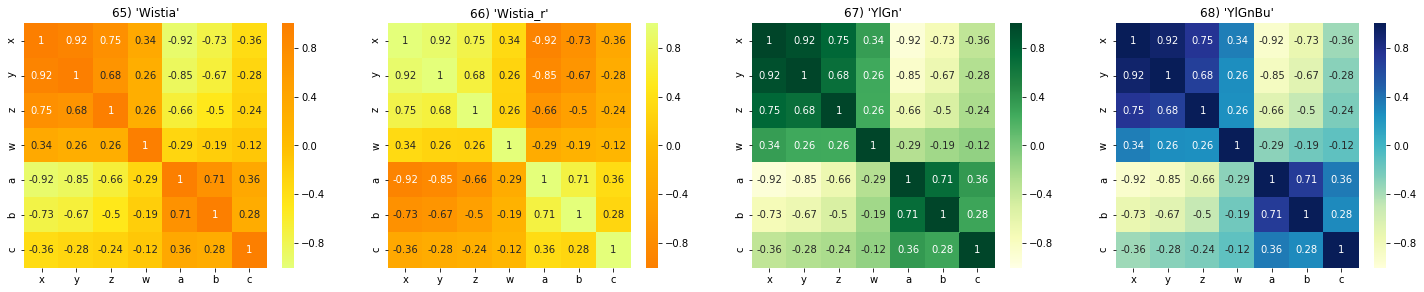

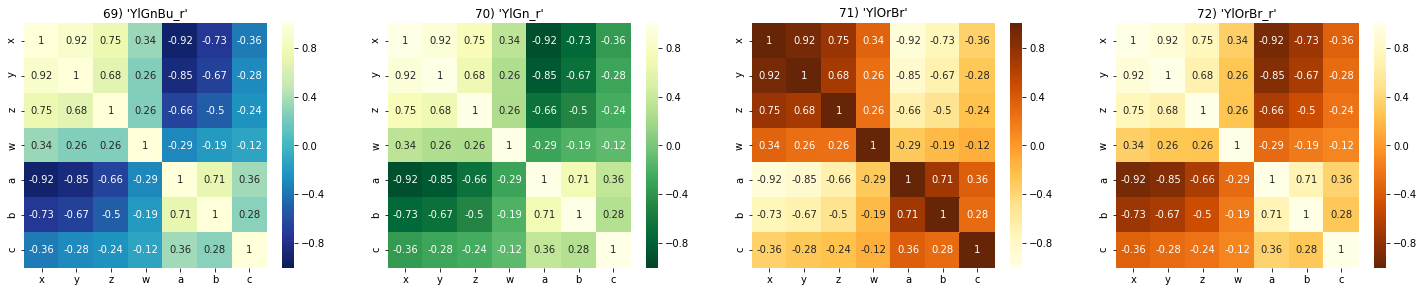

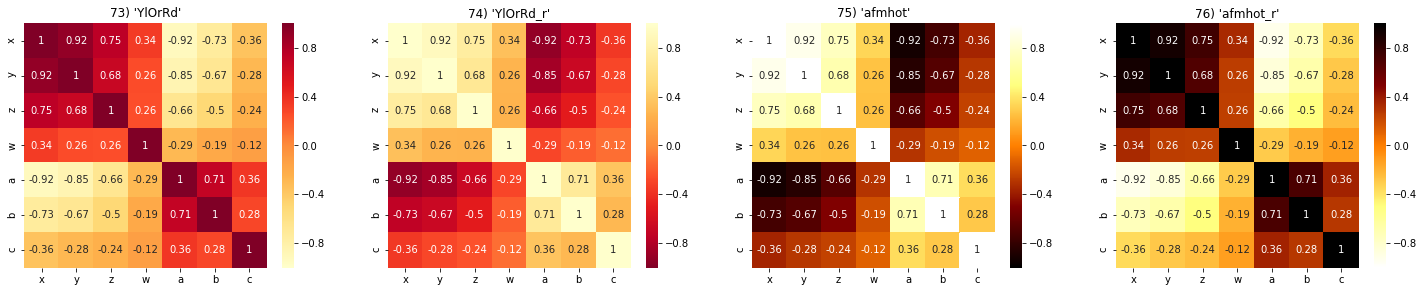

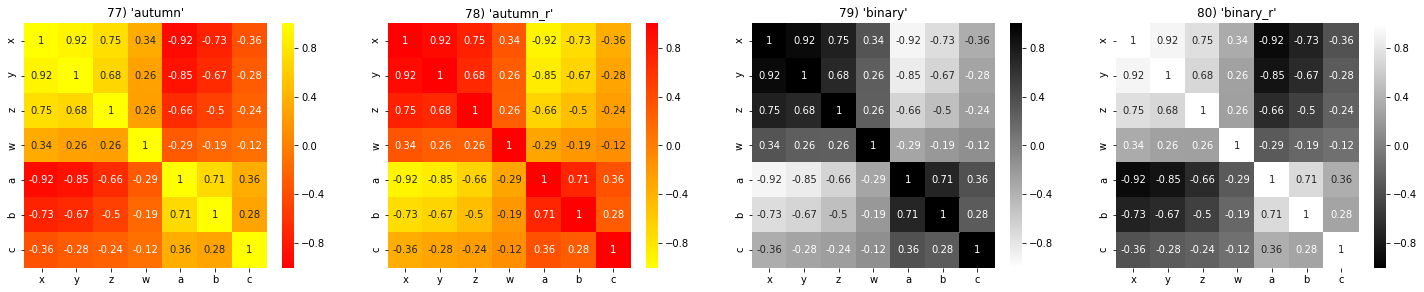

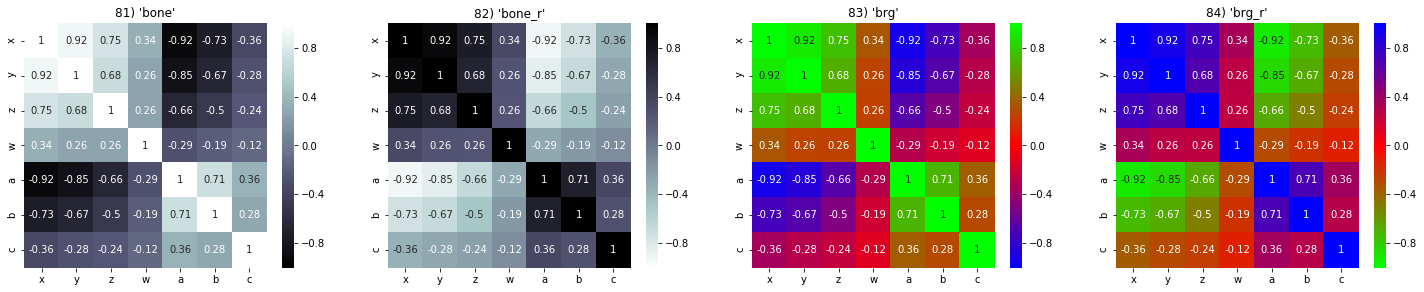

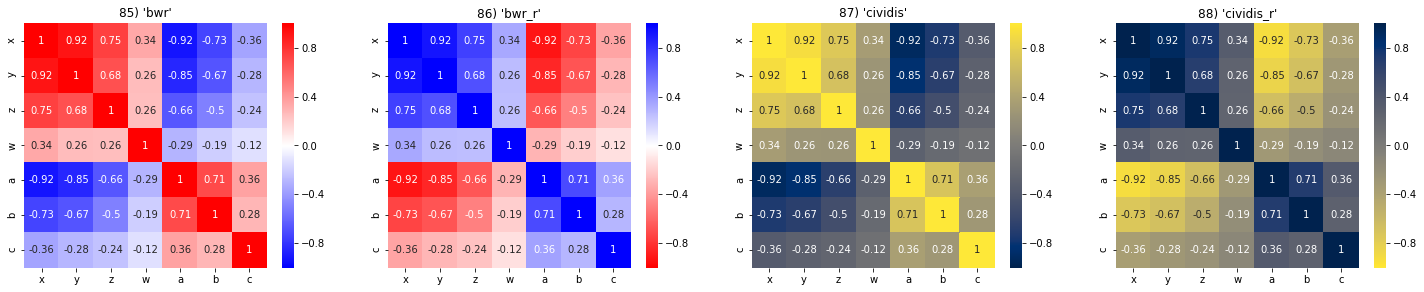

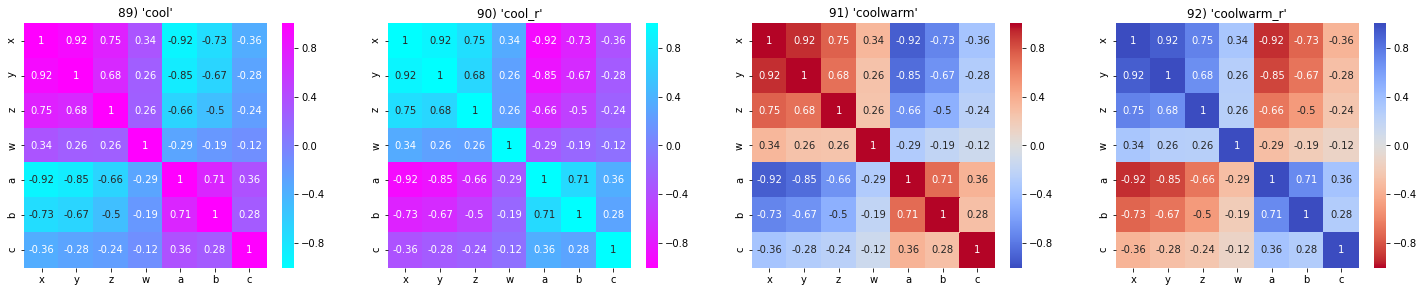

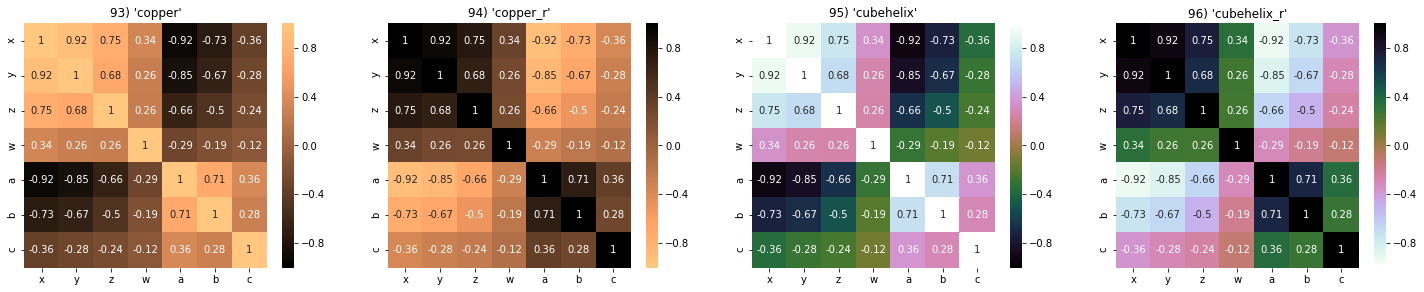

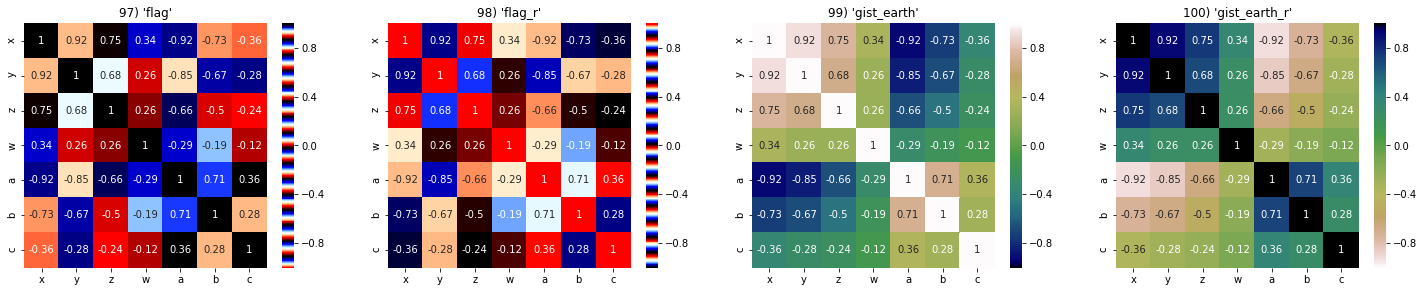

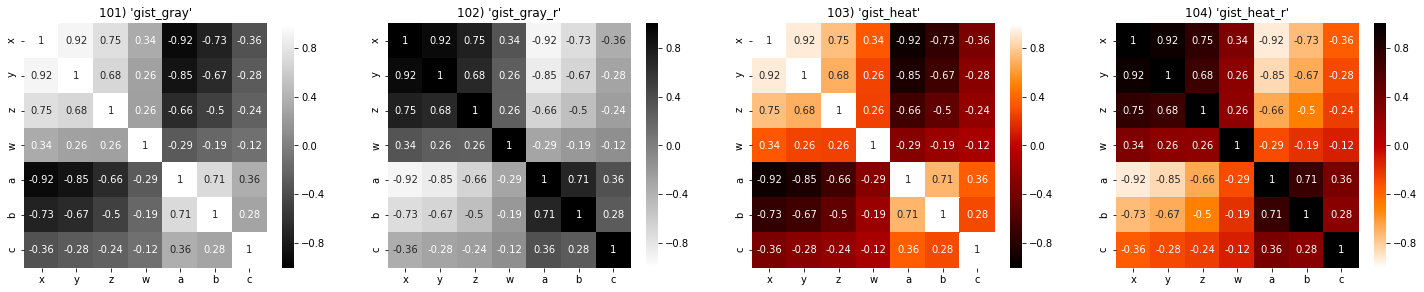

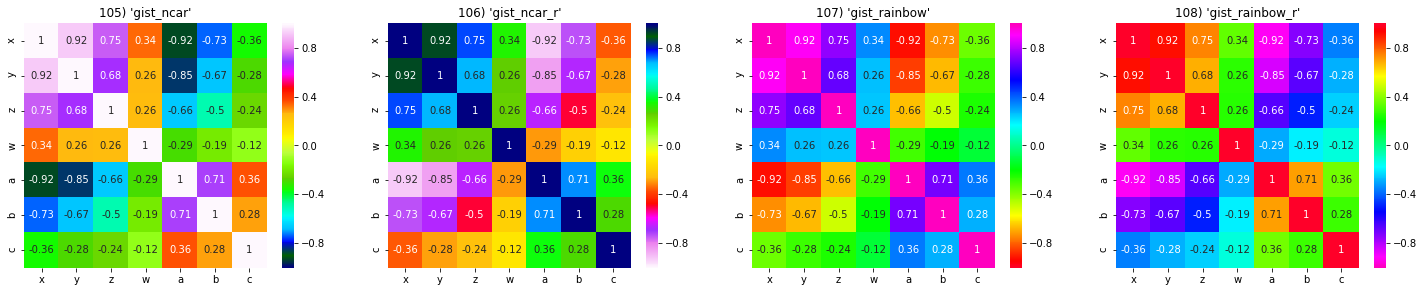

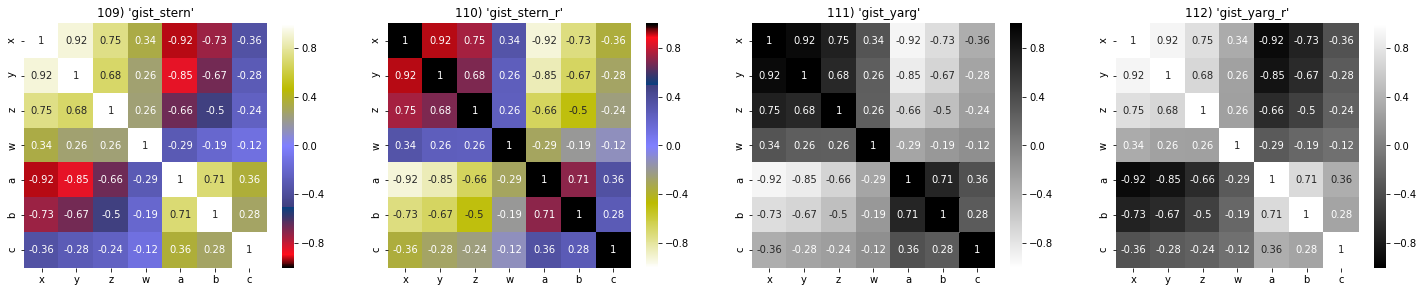

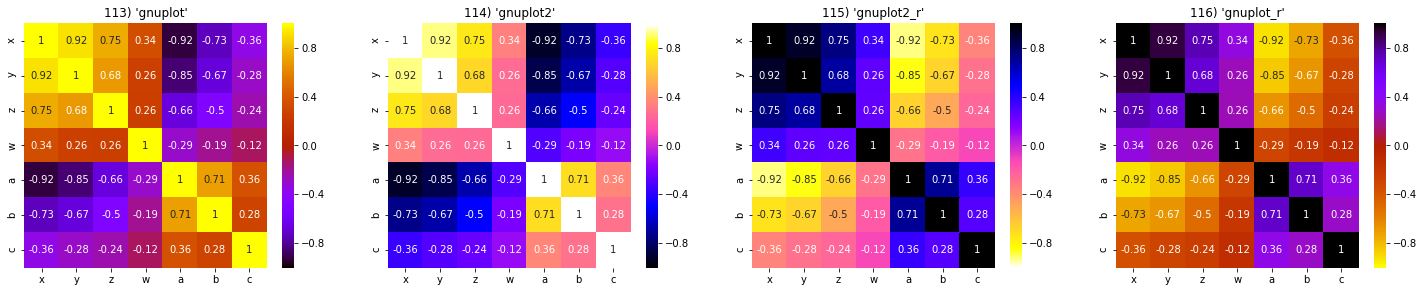

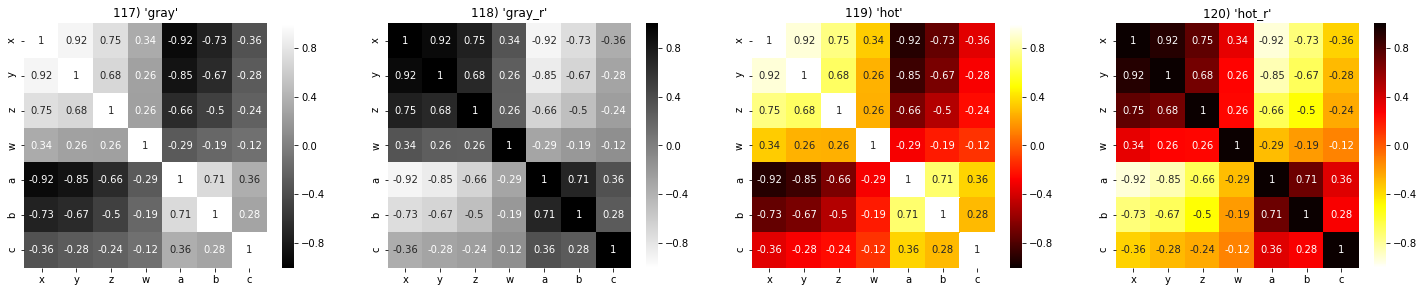

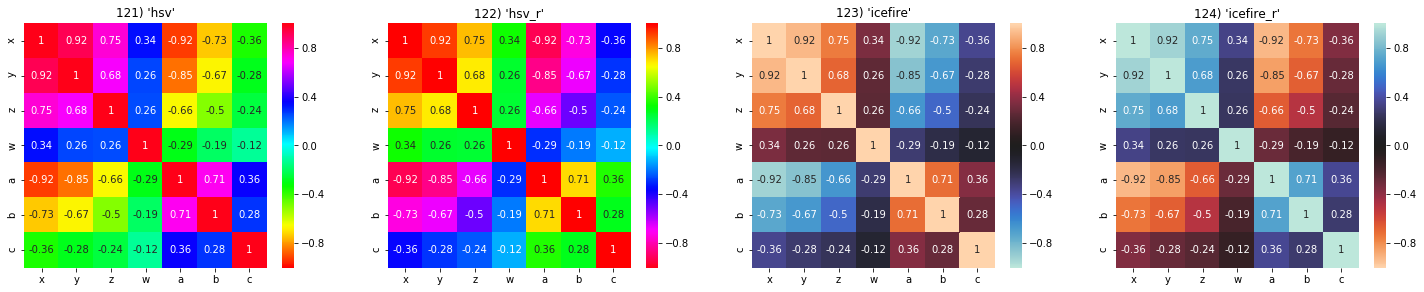

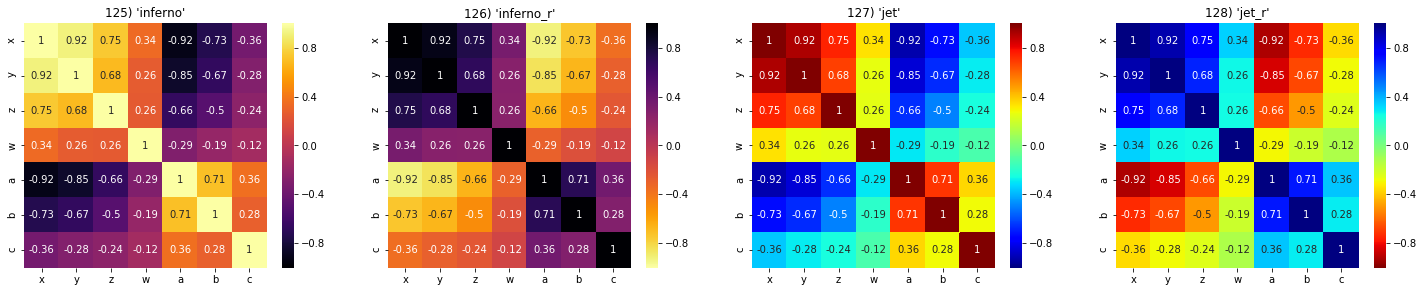

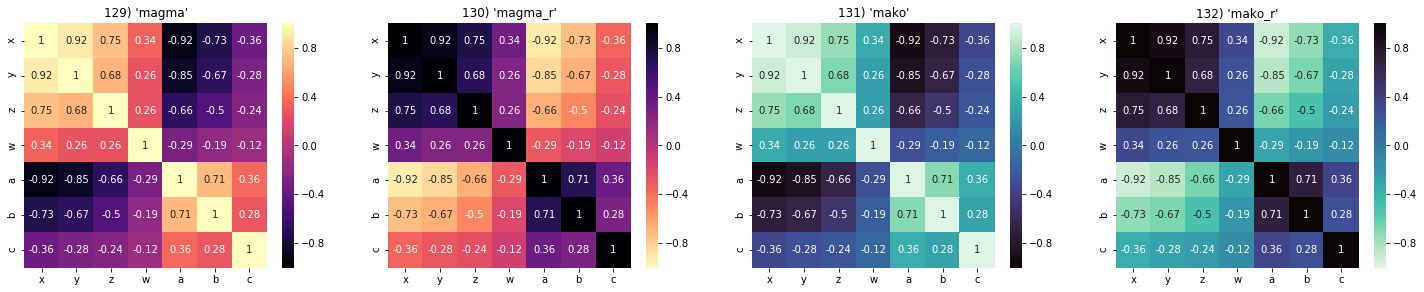

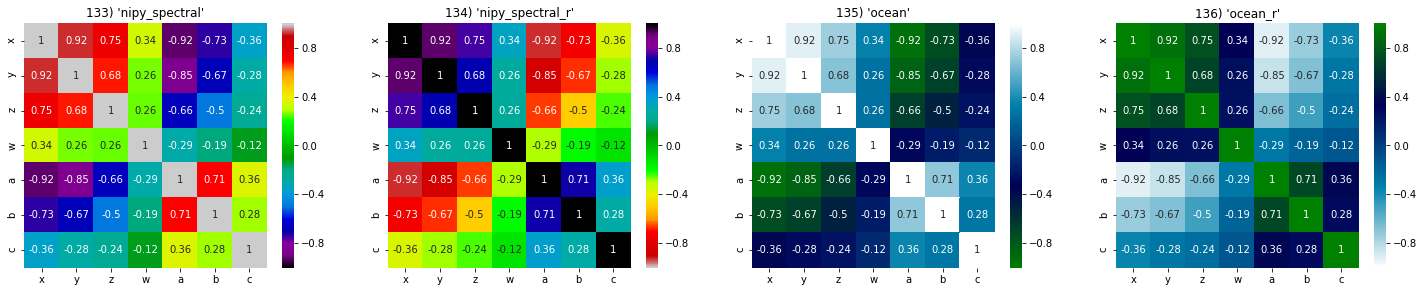

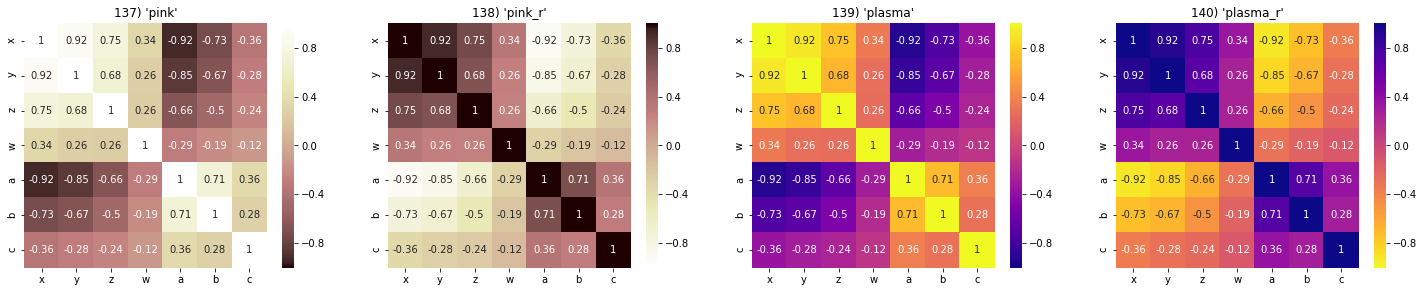

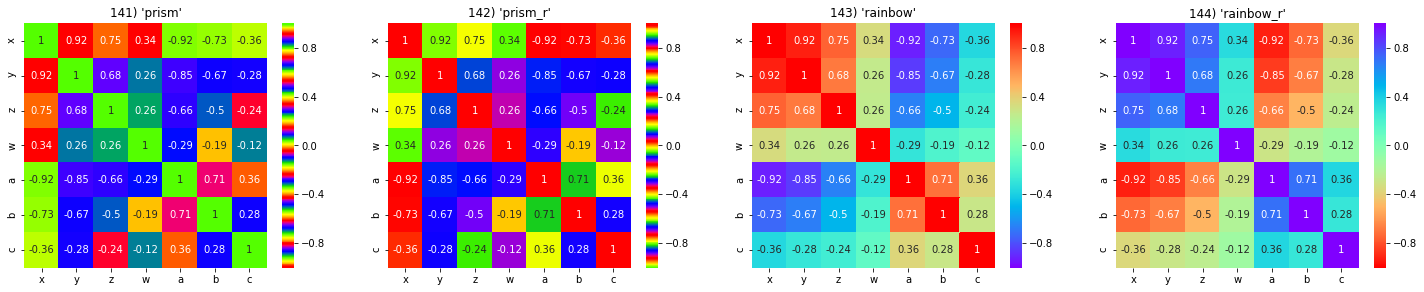

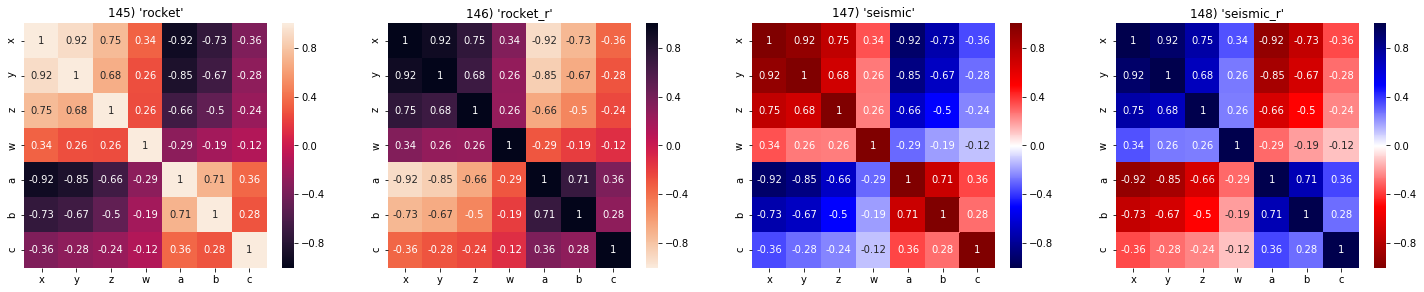

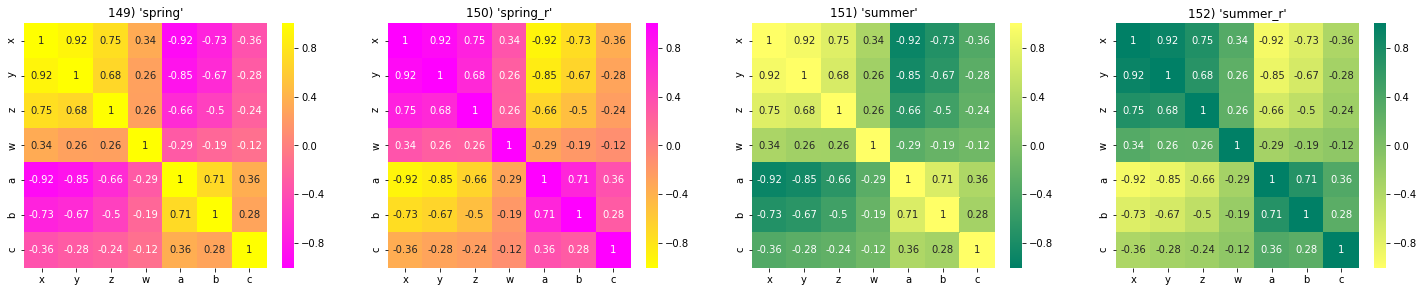

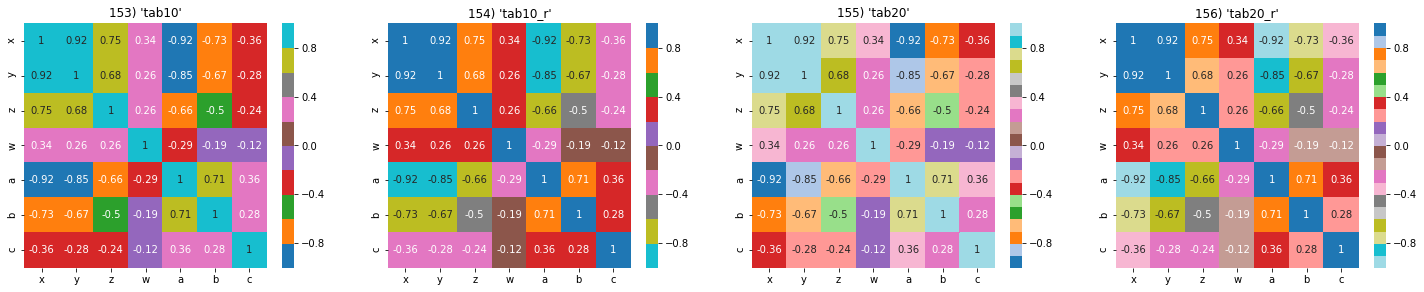

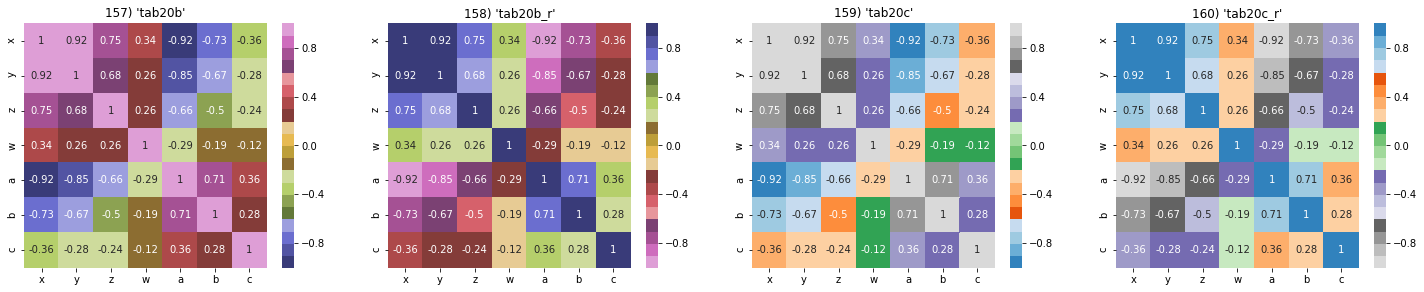

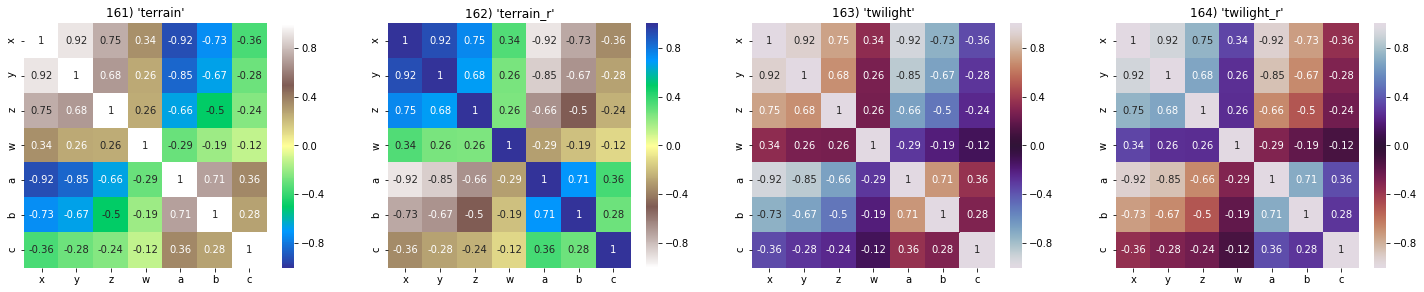

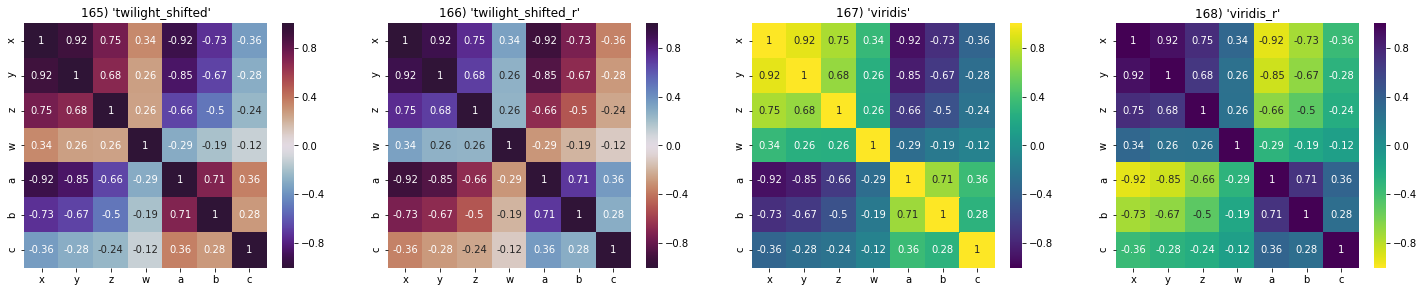

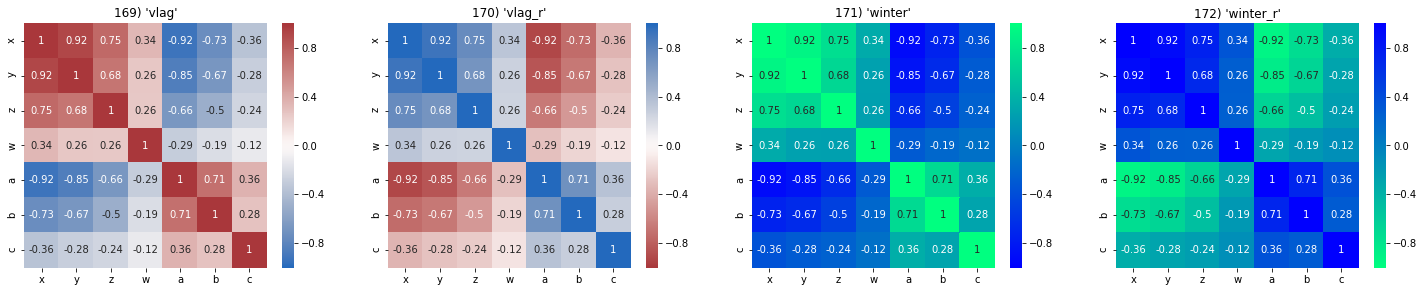

In [6]:
for i, row in enumerate(cmaps): 
    fig, axes = plt.subplots(1, 4, figsize=(25, 4.5))
    
    for j, cmap in enumerate(row):
        axes[j].set_title(f"{4*i+j+1}) '{cmap}'")
        sns.heatmap(corrs, vmin=-1, vmax=1, annot=True, cmap=cmap, ax=axes[j])
    plt.show()

# WITHOUT ANNOTATIONS

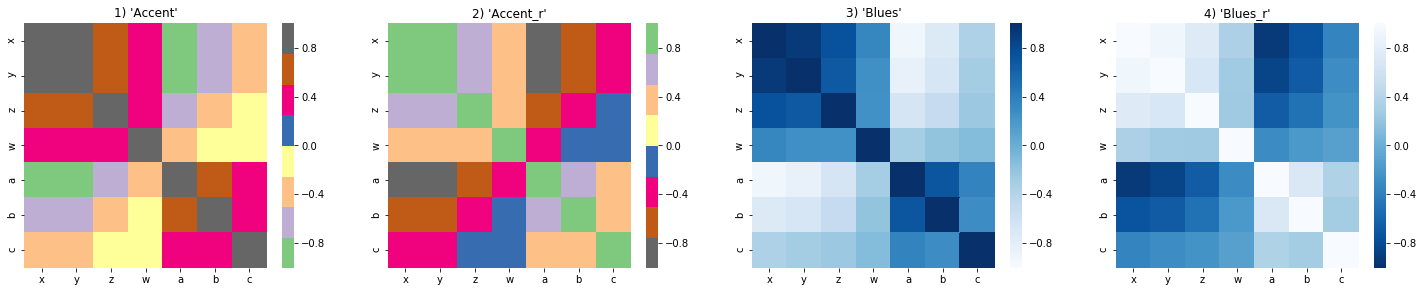

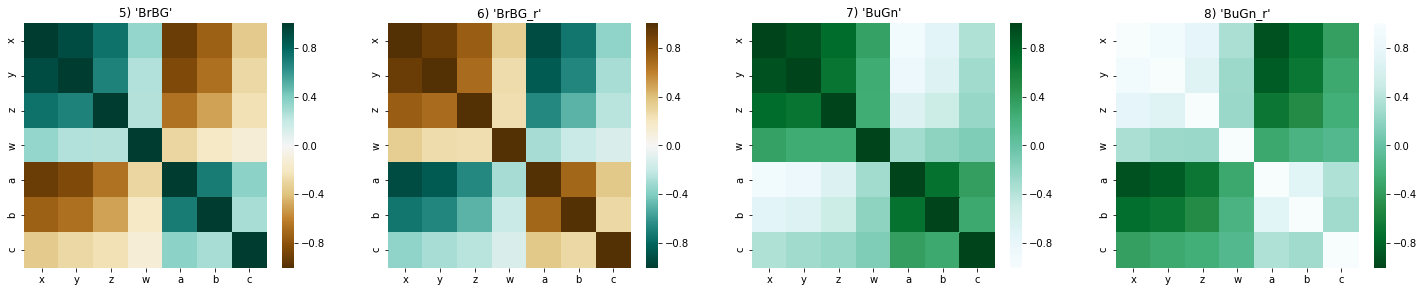

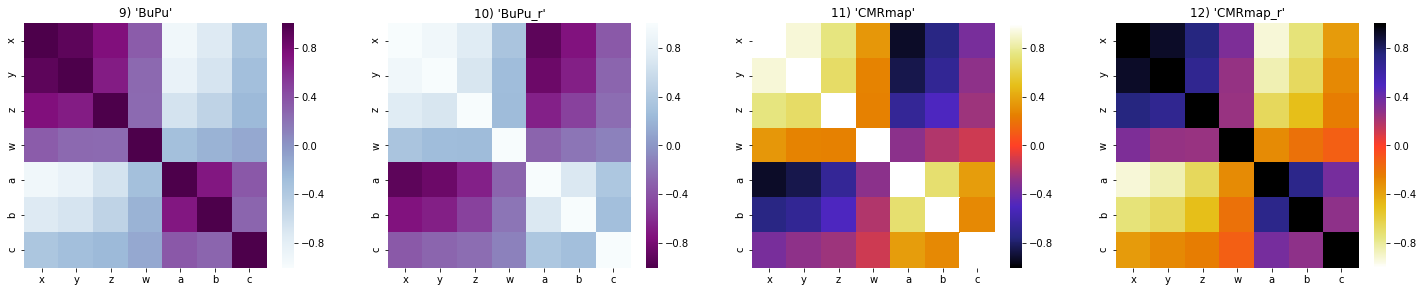

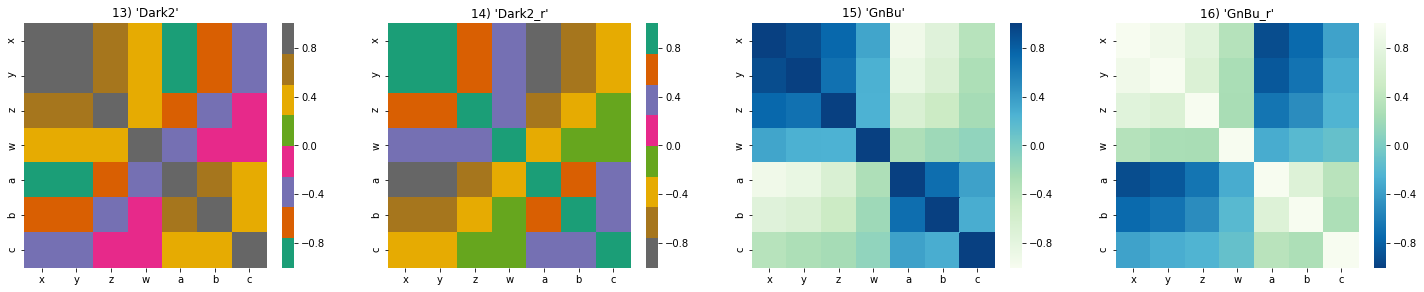

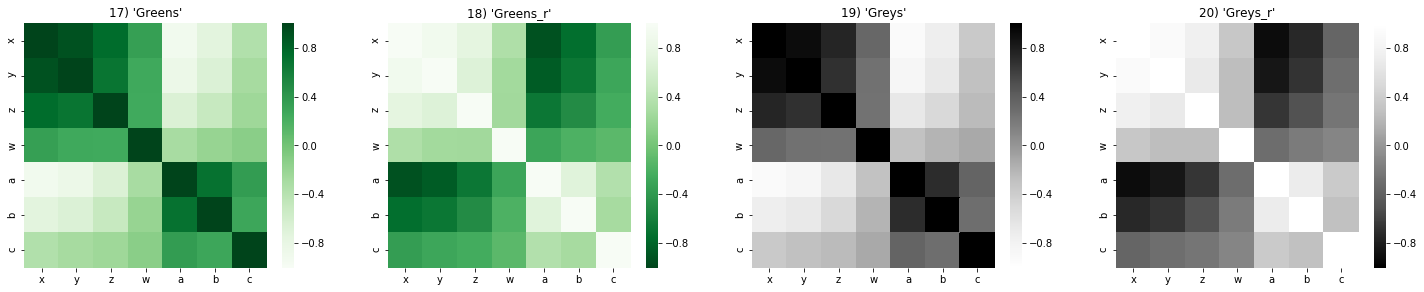

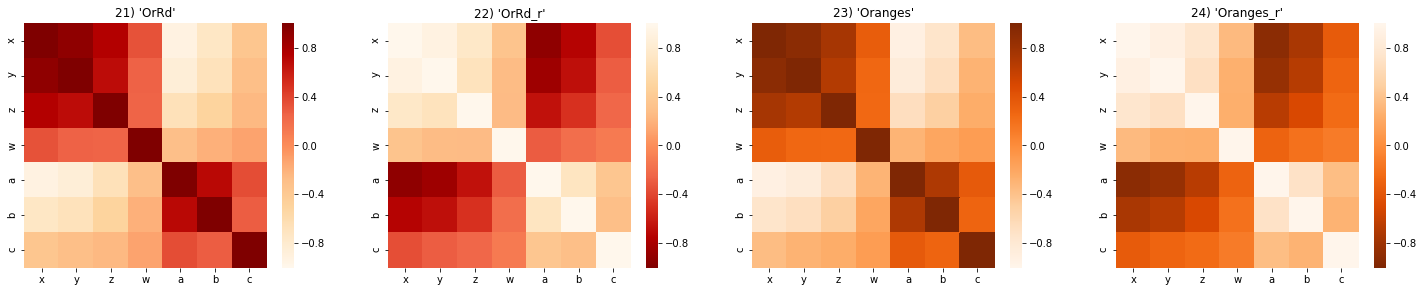

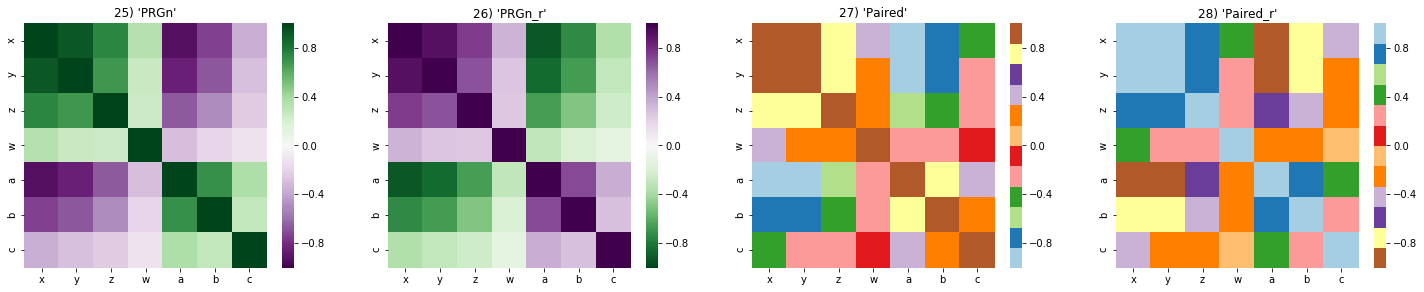

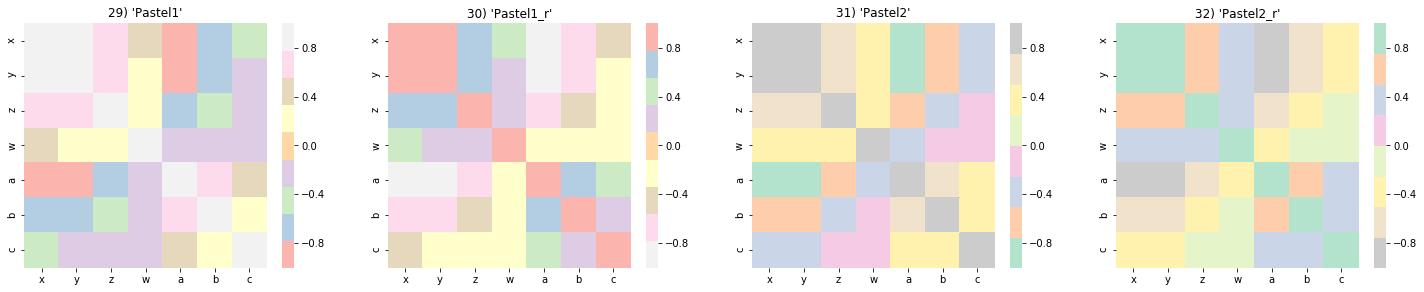

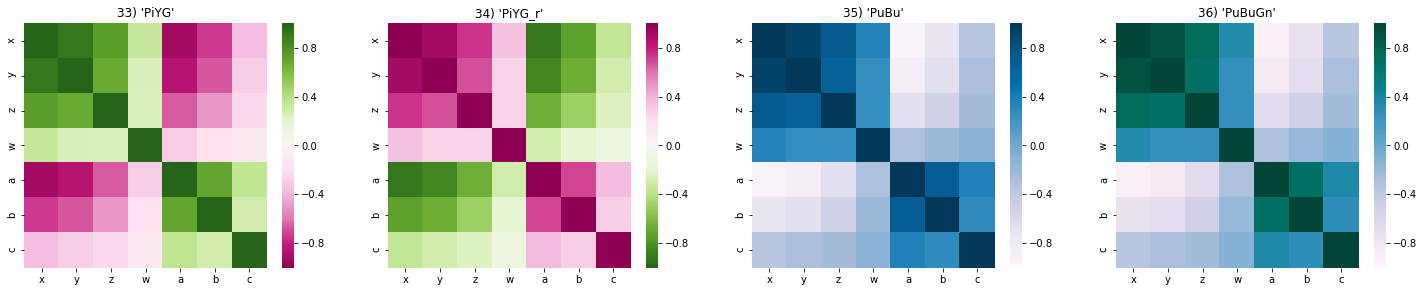

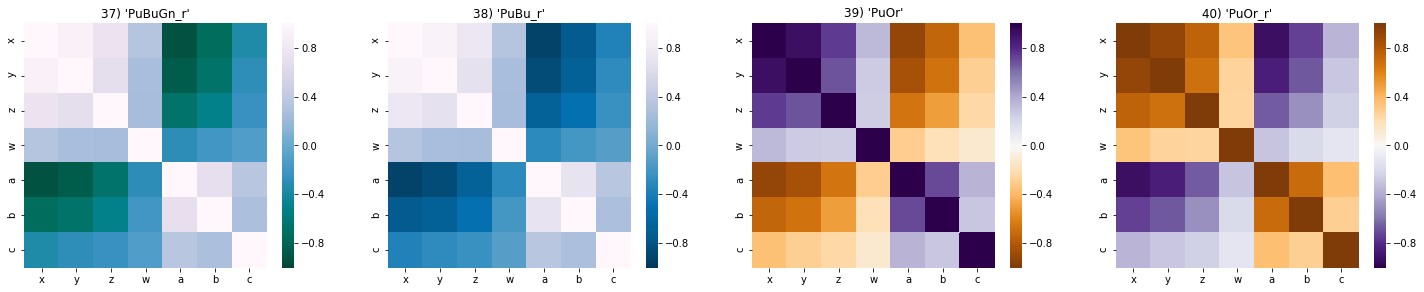

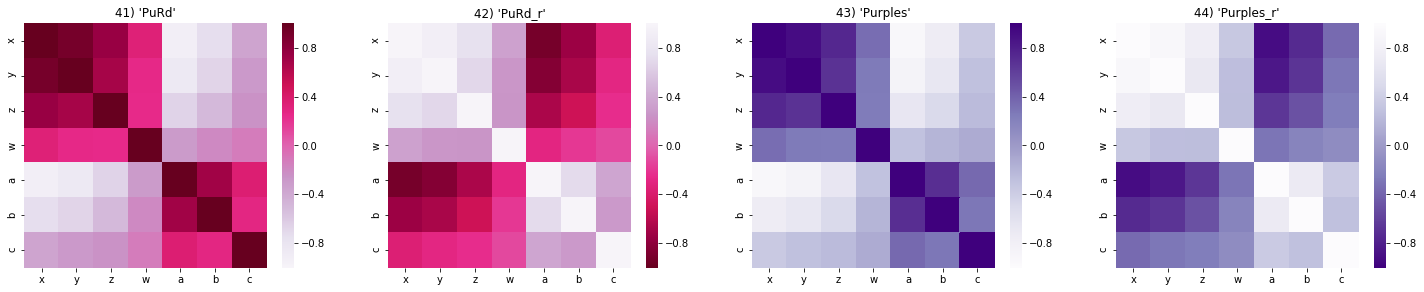

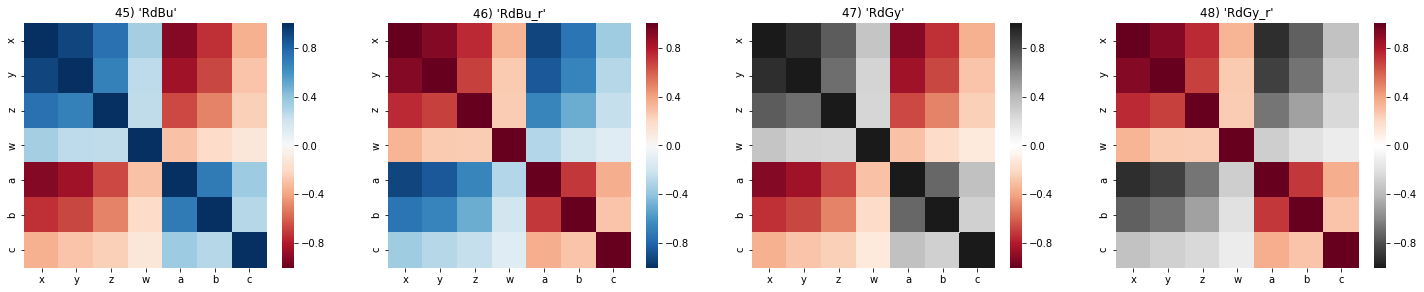

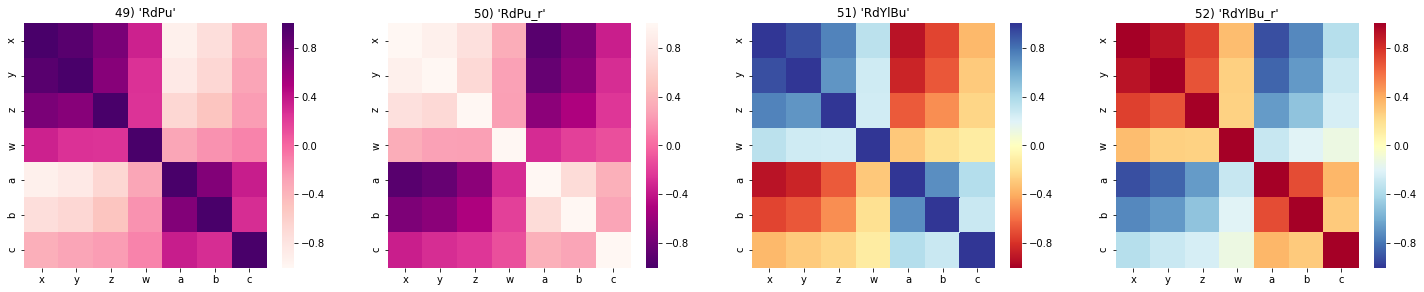

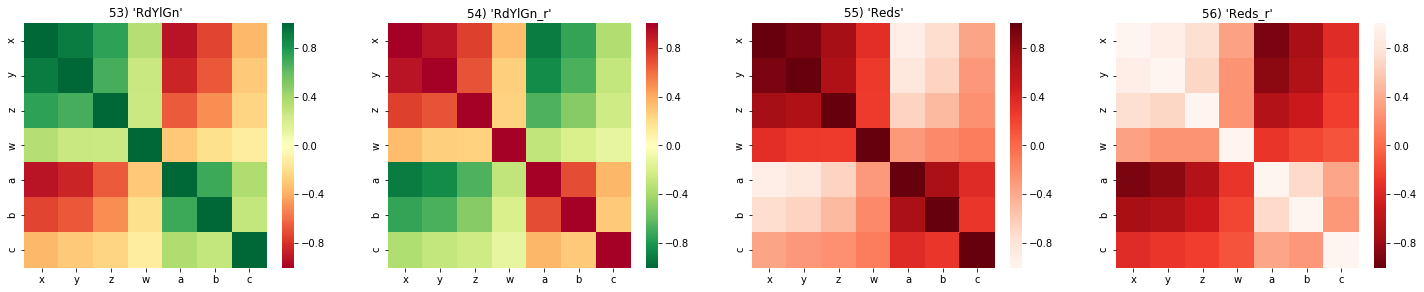

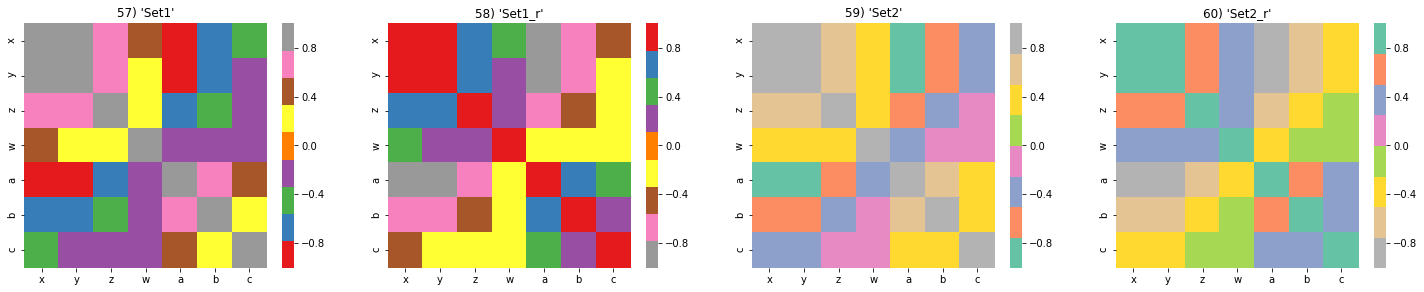

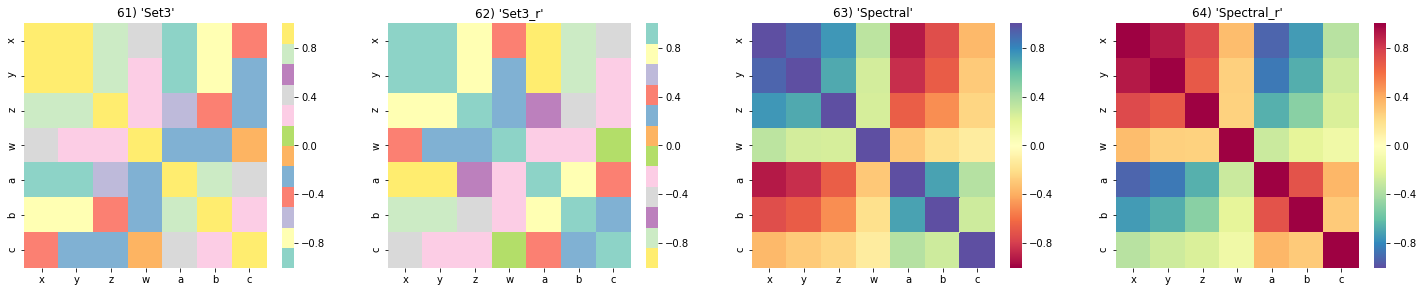

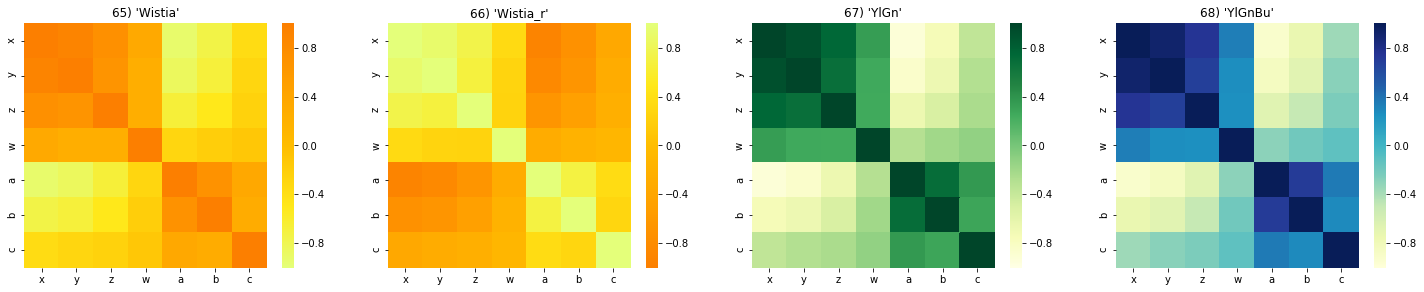

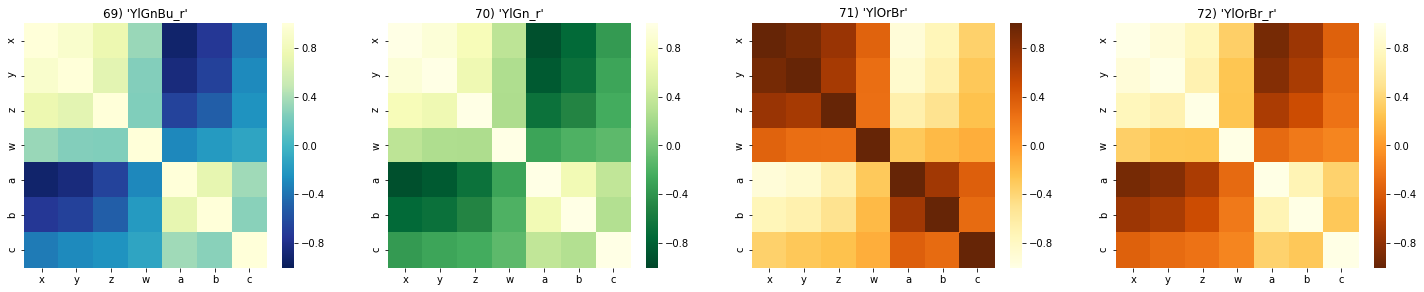

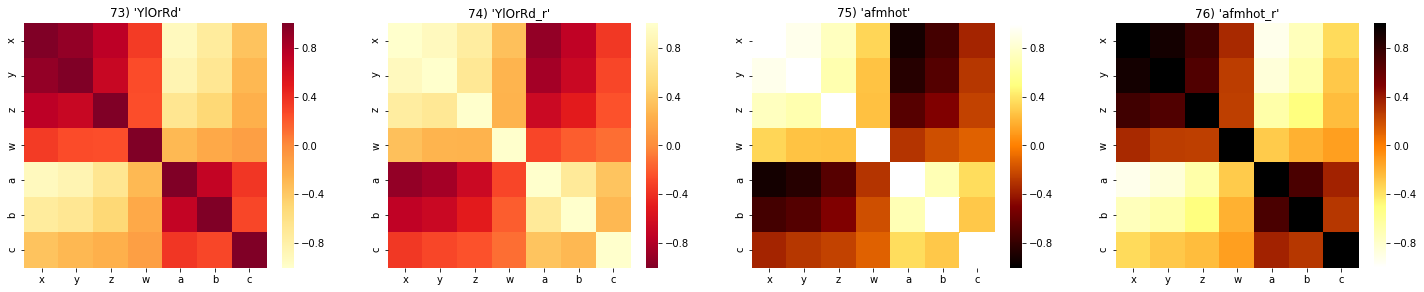

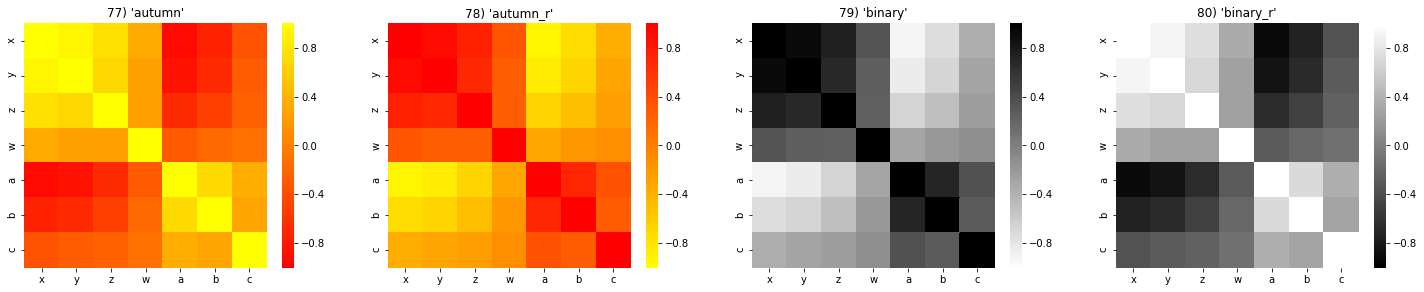

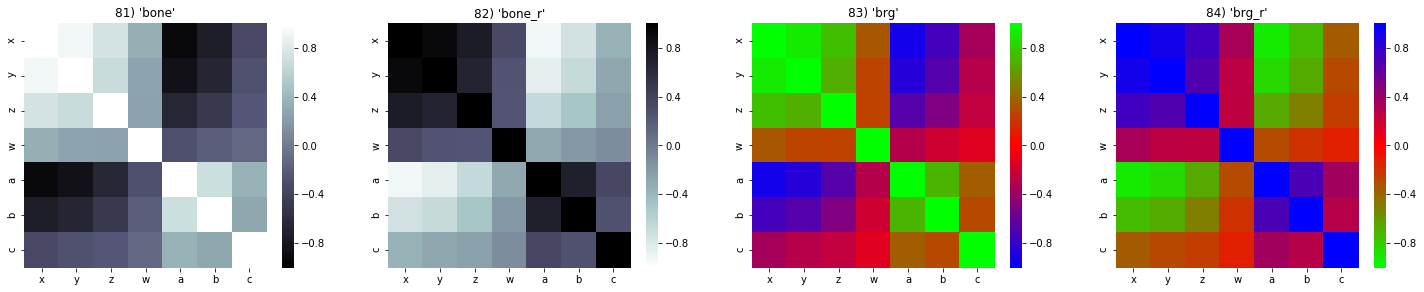

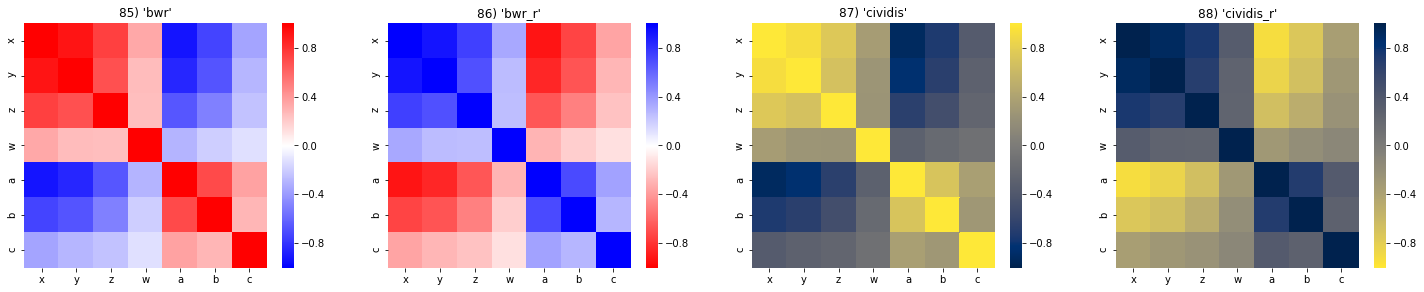

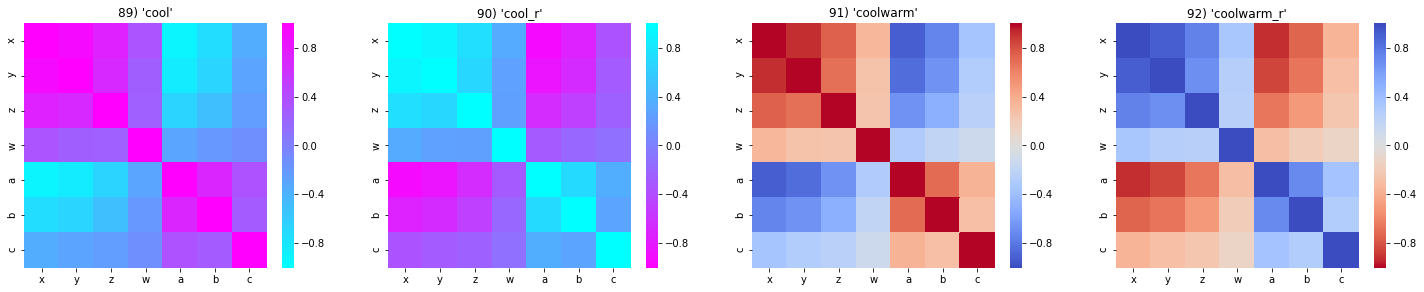

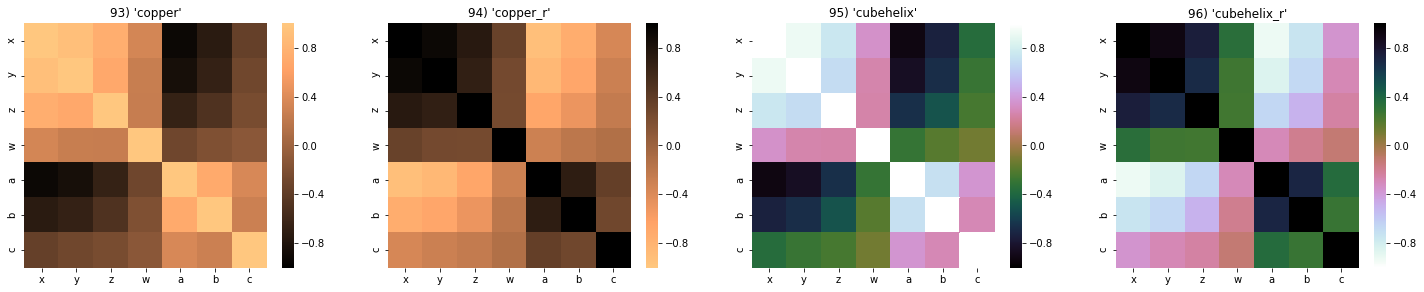

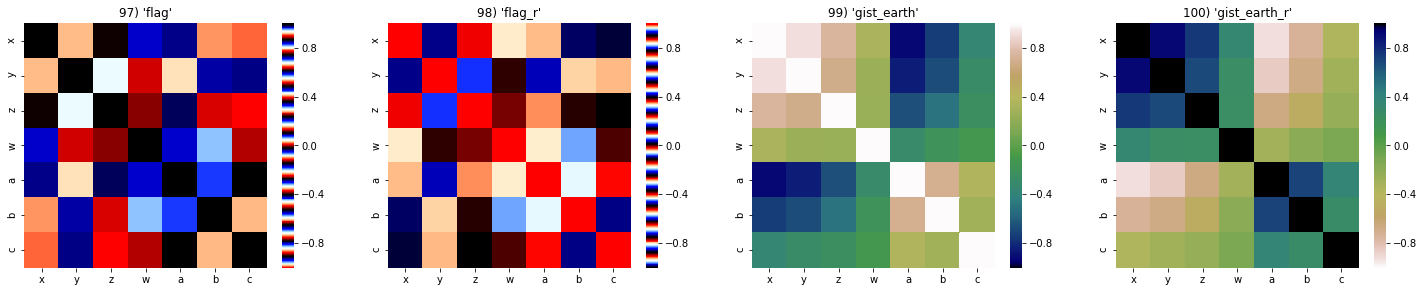

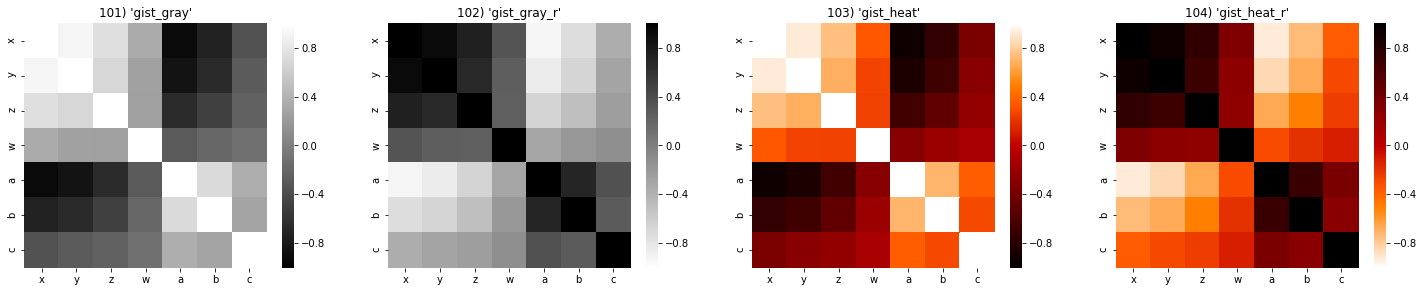

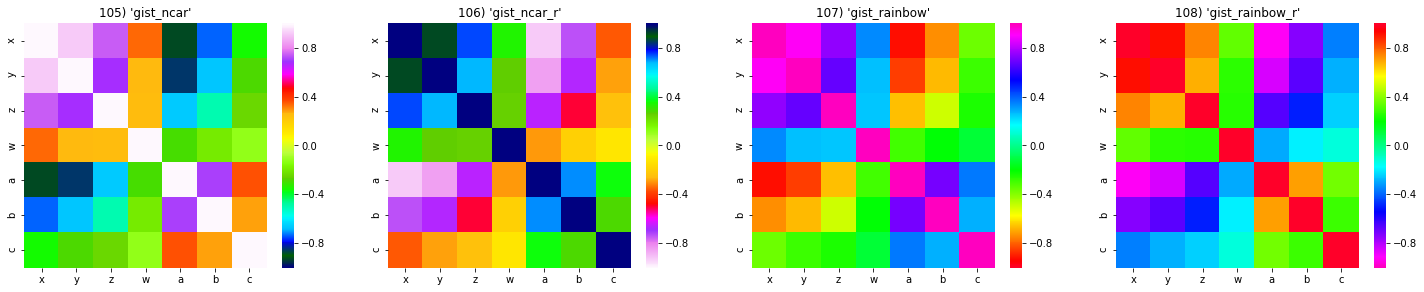

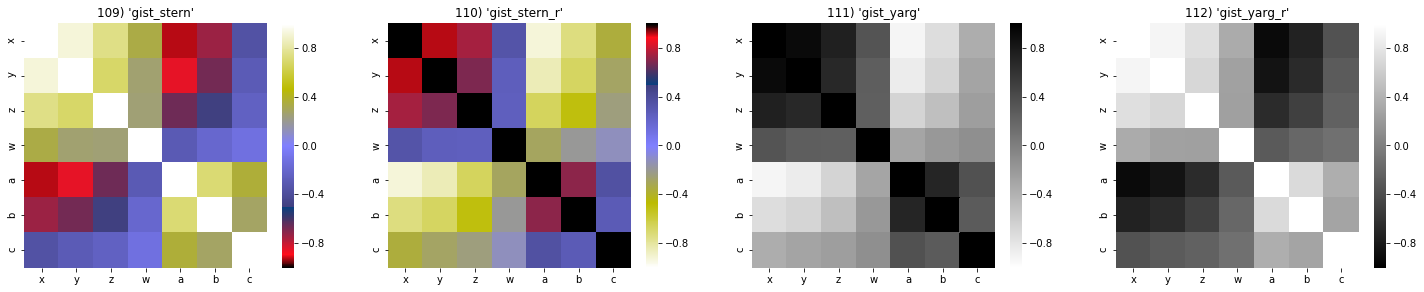

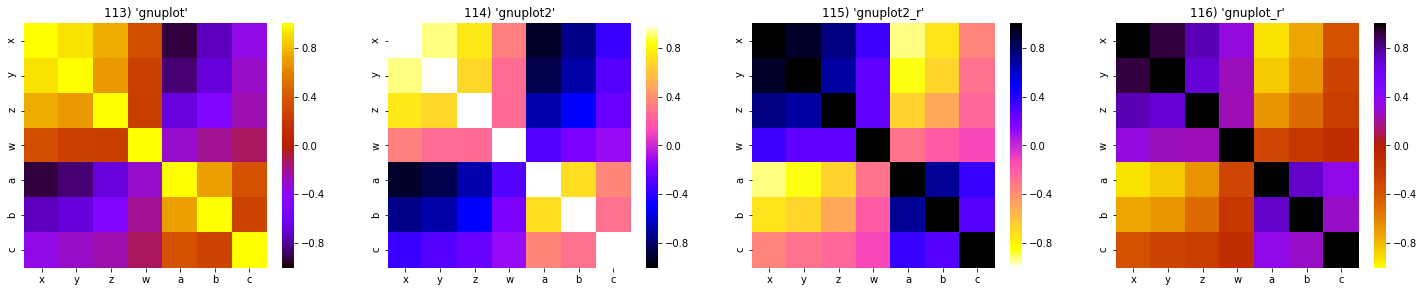

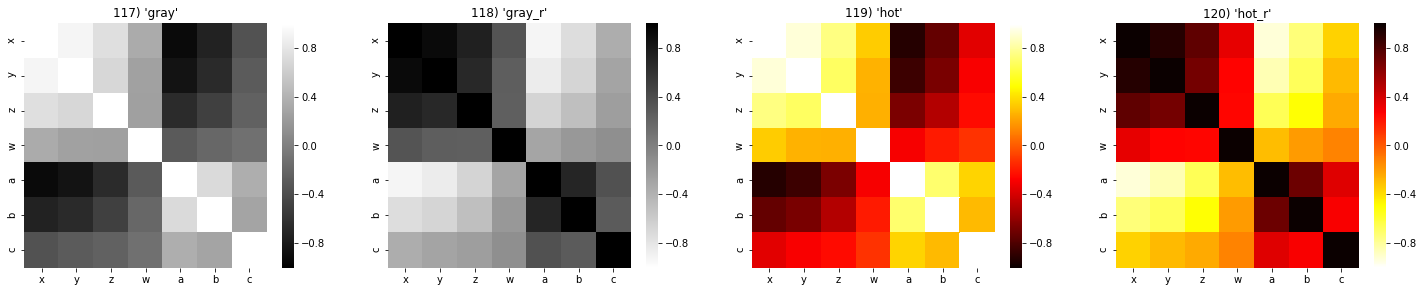

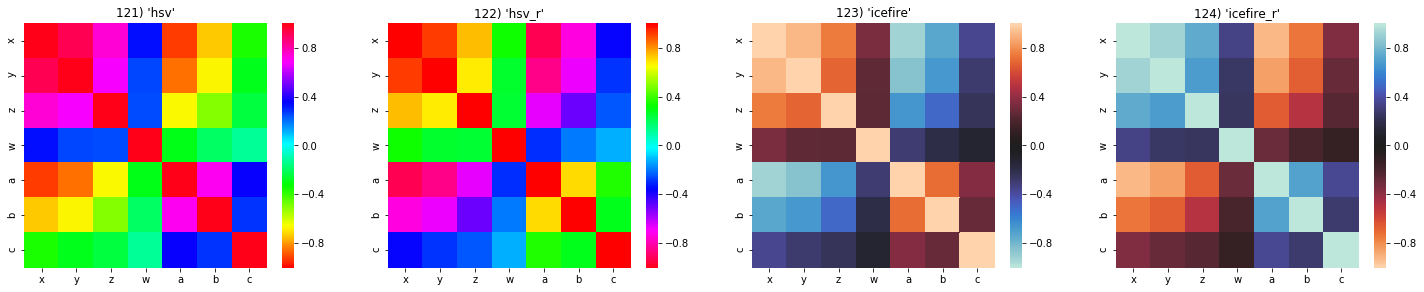

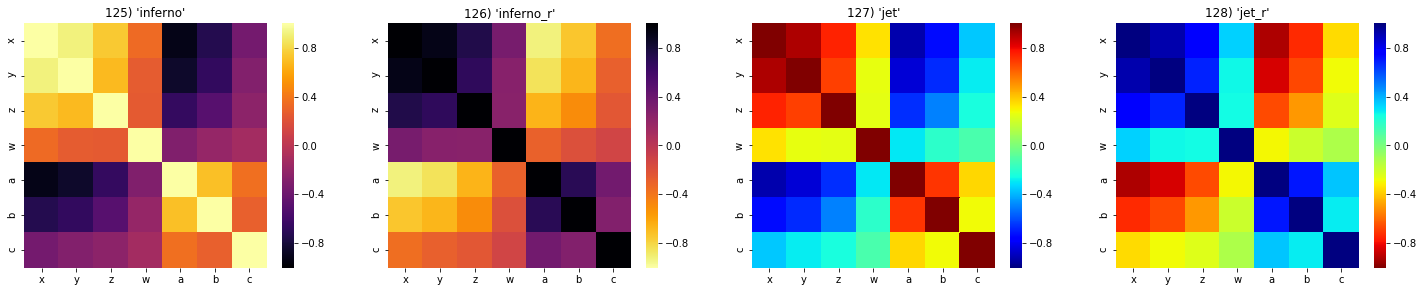

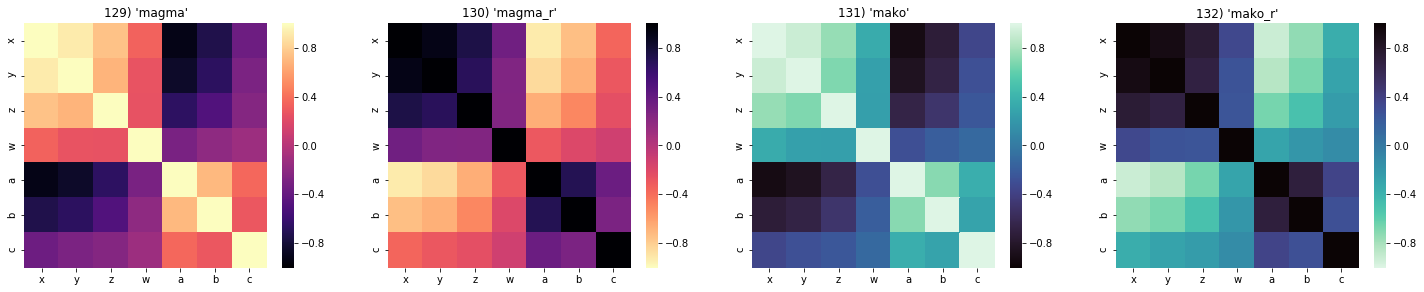

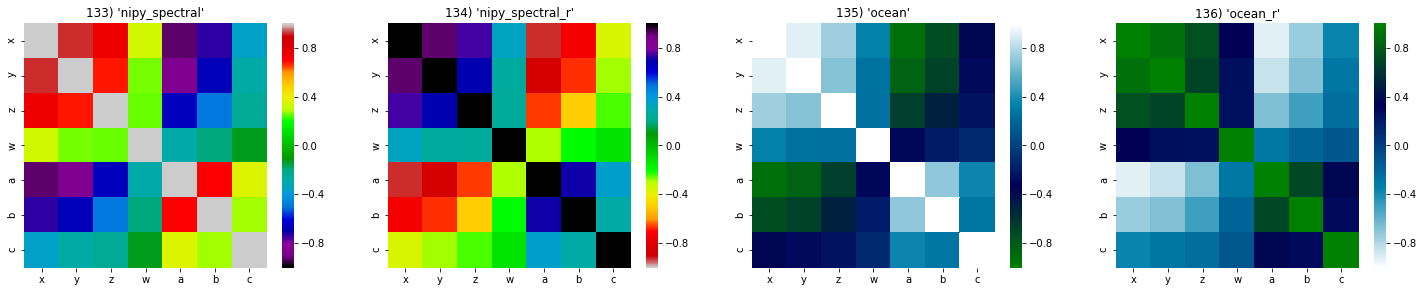

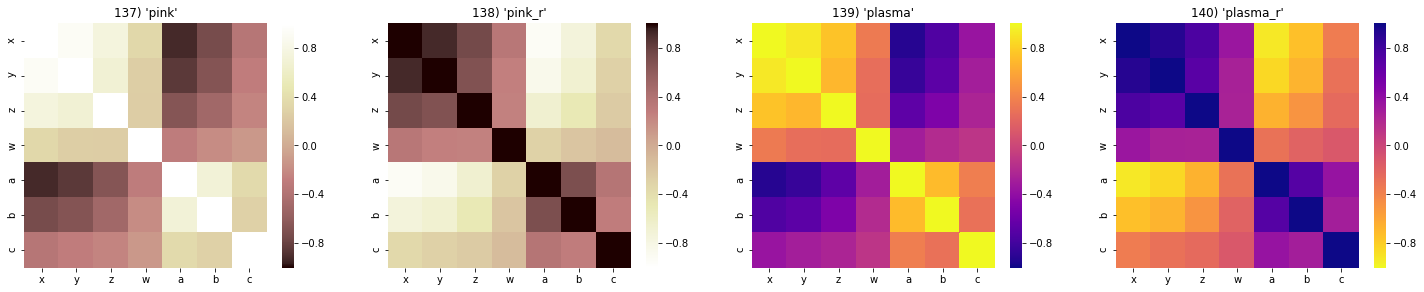

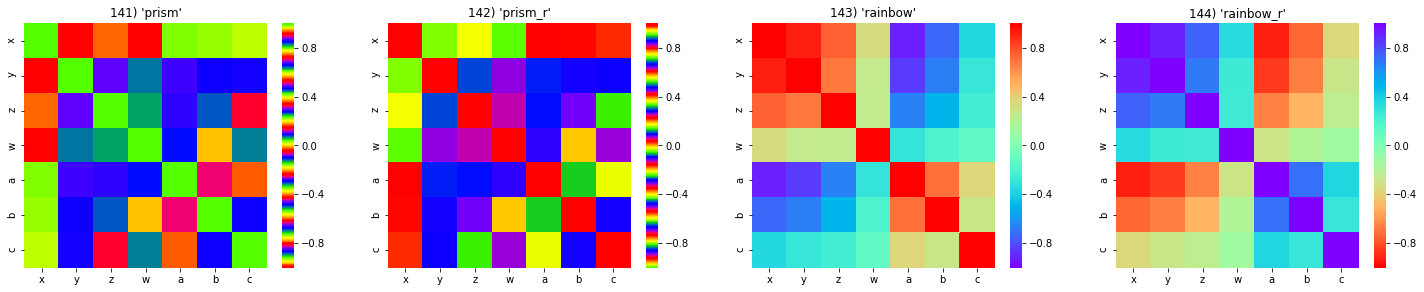

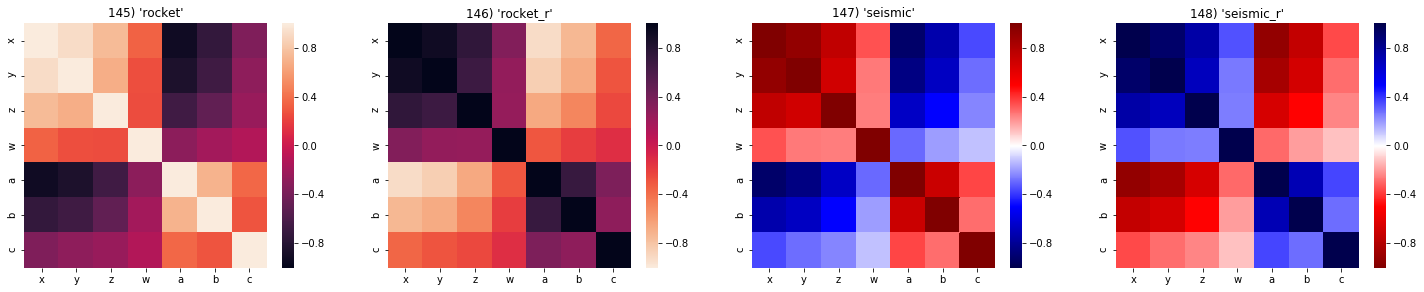

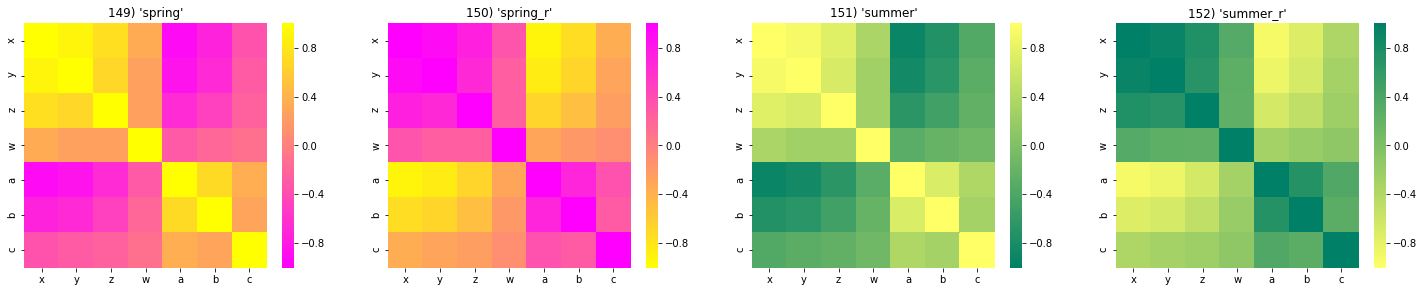

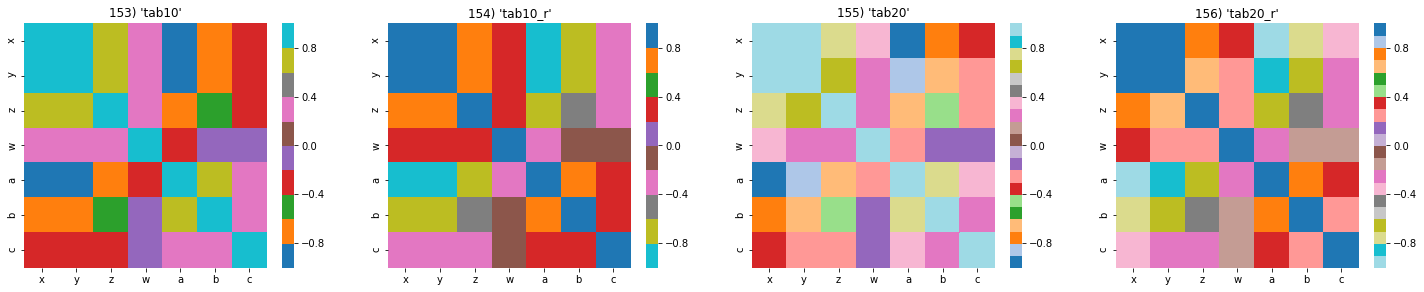

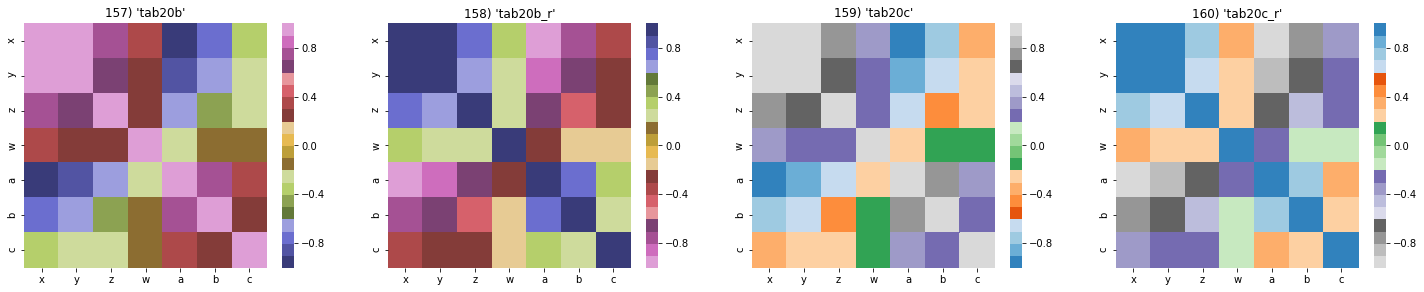

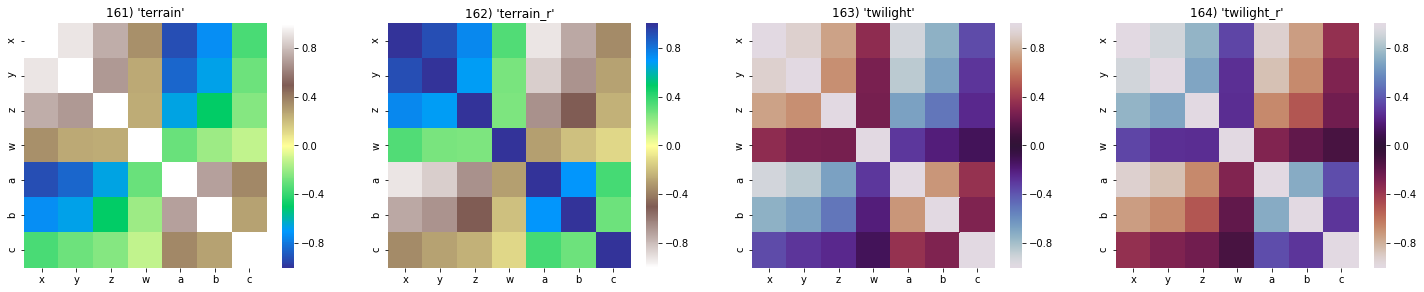

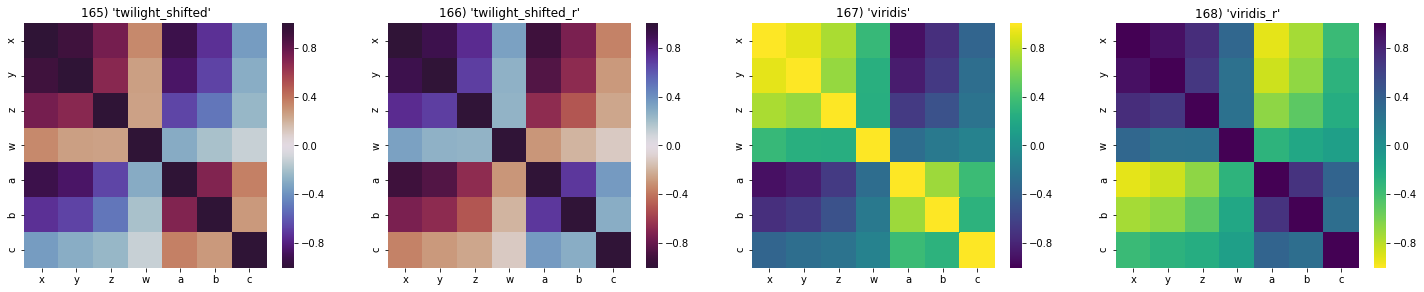

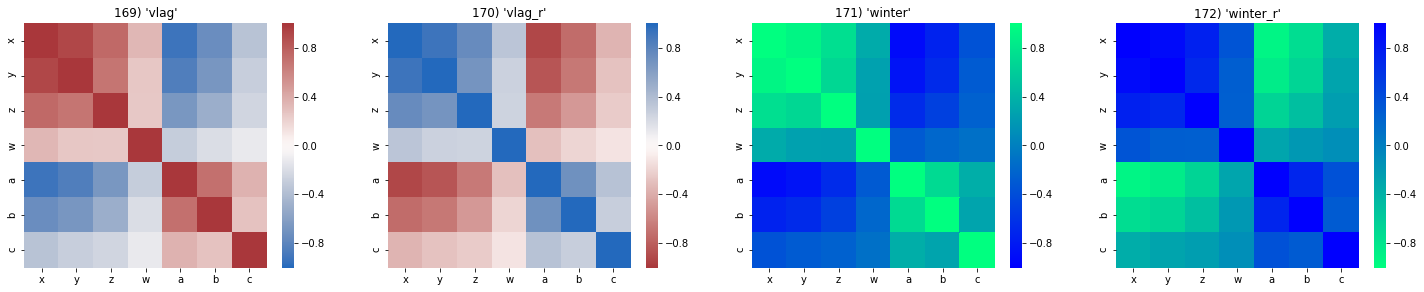

In [7]:
for i, row in enumerate(cmaps): 
    fig, axes = plt.subplots(1, 4, figsize=(25, 4.5))
    
    for j, cmap in enumerate(row):
        axes[j].set_title(f"{4*i+j+1}) '{cmap}'")
        sns.heatmap(corrs, vmin=-1, vmax=1, cmap=cmap, ax=axes[j])
    plt.show()